# Playing with stop words

Nb common words seems to be an interesting feature.
But isn'it disturbed by common words like do, not, and which may precisely be common to many pairs, this without any significance ?
So if remove stop words, nb common feature may have more signficance 

In [1]:
# Ugly incantation to make our 'framework' working
import sys
sys.path.insert(0, r'/SAPDevelop/QuoraPairs/BruteForce/Tools')

#import all our small tools (paths, cache, print,zip,excel, pandas, progress,..)
from Tools.all import *

# setup the name of our experiment
# it will be used to store every result in a unique place
EXPERIMENT='remove_stopwords2'
# Do a bit of checks before actually running code
UNITARY_TEST = True
print_alert('You will use environment %s' % EXPERIMENT)

&lt;IPython.core.display.HTML object&gt;

## Build our initial features
* Nb words in question 1
* Nb words in question 2
* Nb common words
* Nb common words/nb words in question 1
* Nb common words/nb words in question 2
* Nb non common words in question 1
* Nb non common words in question 2
* Nb common words/(Nb words in question1 + Nb words in question2)

**Notes**
* Input data is not processed except for basic unicode clean
* Heavy to generate so result is cached
* This may be overkill as features will be eliminated but features are also generated for challenge data

In [2]:
def add_column_from_columns(dataframe,output_column_name,function):
    dataframe[output_column_name]=dataframe.progress_apply(function,axis=1)
    #dataframe[output_column_name]=dataframe.progress_apply(function,axis=1)
    return dataframe[output_column_name]

def add_column_from_column(dataframe,output_column_name,input_column_name,function):
    dataframe[output_column_name]=dataframe[input_column_name].progress_apply(function)
    #dataframe[output_column_name]=dataframe[input_column_name].progress_apply(function)
    return dataframe[output_column_name]

def build_all_simple_features(dataframe):
    print_warning('Compute common_words between question1 & question2')
    add_column_from_column(dataframe,'nb_words_question1','question1',lambda x: len(x.split()))
    add_column_from_column(dataframe,'nb_words_question2','question2',lambda x: len(x.split()))

    #print_warning('Compute abs(Nb words in question 1 - Nb words in question 2)')
    #add_column_from_columns(dataframe,'abs(nb1-nb2)',lambda r: abs(r.nb_words_question1-r.nb_words_question2))

    print_warning('Compute Nb common_words between question1 & question2')
    add_column_from_columns(dataframe,'common_words',lambda r: list(set(r.question1.split())&set(r.question2.split())))
    add_column_from_column(dataframe,'nb_common_words','common_words',len)

    print_warning('Compute Nb common words/nb words in question1')
    add_column_from_columns(dataframe,'nb_common_words/nb_words_question1',lambda r: r.nb_common_words/max(1,r.nb_words_question1))
    print_warning('Compute Nb common words/nb words in question2')
    add_column_from_columns(dataframe,'nb_common_words/nb_words_question2',lambda r: r.nb_common_words/max(1,r.nb_words_question2))

    print_warning('Compute Nb words in question1,question2 not in common words')
    add_column_from_columns(dataframe,'nb_words_question1-common_words',lambda r: len(list(set(r.question1.split())-set(r.common_words))))
    add_column_from_columns(dataframe,'nb_words_question2-common_words',lambda r: len(list(set(r.question2.split())-set(r.common_words))))
    print_warning('Compute (nb common words)/(nb words in question1+nb word in question2)')
    add_column_from_columns(dataframe,'nb_common_words/(nb_words_question1+nb_words_question2)',lambda r: r.nb_common_words/(r.nb_words_question1+r.nb_words_question2))
    dataframe=dataframe.drop(columns='common_words')
    return dataframe

In [3]:
prepare_environnement(EXPERIMENT)
train_dataframe=load_dataframe(CLEAN_TRAINING_DATA)
challenge_dataframe=load_dataframe(CLEAN_CHALLENGE_DATA)
print_section('Untouched input data has been loaded. Training: %d lines Challenge: %d lines' % (len(train_dataframe),len(challenge_dataframe)))

train_dataframe=load_or_build_dataframe('Training data + basic features','training_basic_features',build_all_simple_features,train_dataframe)
challenge_dataframe=load_or_build_dataframe('Challenge data + basic features','challenge_basic_features',build_all_simple_features,challenge_dataframe)

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

## We fix a mistake we did early :  don't forget put everything in lower case !
So, we build a fresh new input data with basic features from scratch

In [4]:
def build_lower_all_simple_features(dataframe):
    print_info('lower case everything')
    dataframe['lower_question1'] = dataframe['question1'].str.lower()
    dataframe['lower_question2'] = dataframe['question2'].str.lower()
    print_warning('Compute common_words between question1 & question2')
    # Useless but More clear
    dataframe['lower_nb_words_question1'] = dataframe['nb_words_question1'].copy()
    dataframe['lower_nb_words_question2'] = dataframe['nb_words_question2'].copy()

    print_warning('Compute Nb common_words between question1 & question2')
    add_column_from_columns(dataframe,'lower_common_words',lambda r: list(set(r.lower_question1.split())&set(r.lower_question2.split())))
    add_column_from_column(dataframe,'lower_nb_common_words','lower_common_words',len)

    print_warning('Compute Nb common words/nb words in question1')
    add_column_from_columns(dataframe,'lower_nb_common_words/lower_nb_words_question1',lambda r: r.lower_nb_common_words/max(1,r.lower_nb_words_question1))
    print_warning('Compute Nb common words/nb words in question2')
    add_column_from_columns(dataframe,'lower_nb_common_words/lower_nb_words_question2',lambda r: r.lower_nb_common_words/max(1,r.lower_nb_words_question2))

    print_warning('Compute Nb words in question1,question2 not in common words')
    add_column_from_columns(dataframe,'lower_nb_words_question1-common_words',lambda r: len(list(set(r.lower_question1.split())-set(r.lower_common_words))))
    add_column_from_columns(dataframe,'lower_nb_words_question2-common_words',lambda r: len(list(set(r.lower_question2.split())-set(r.lower_common_words))))
    print_warning('Compute (nb common words)/(nb words in question1+nb word in question2)')
    add_column_from_columns(dataframe,'lower_nb_common_words/(lower_nb_words_question1+lower_nb_words_question2)',lambda r: r.lower_nb_common_words/max(1,(r.lower_nb_words_question1+r.lower_nb_words_question2)))
    dataframe=dataframe.drop(columns='lower_common_words')
    return dataframe

lower_train_dataframe = load_or_build_dataframe('Training data in lower case + basic features','training_lower_basic_features',build_lower_all_simple_features,train_dataframe)

lower_challenge_dataframe = load_or_build_dataframe('CHallenge data in lower case + basic features','challenge_lower_basic_features',build_lower_all_simple_features,challenge_dataframe)

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

### Did it change something ?


&lt;IPython.core.display.HTML object&gt;

&lt;matplotlib.legend.Legend at 0x7fc4fcf88ee0&gt;

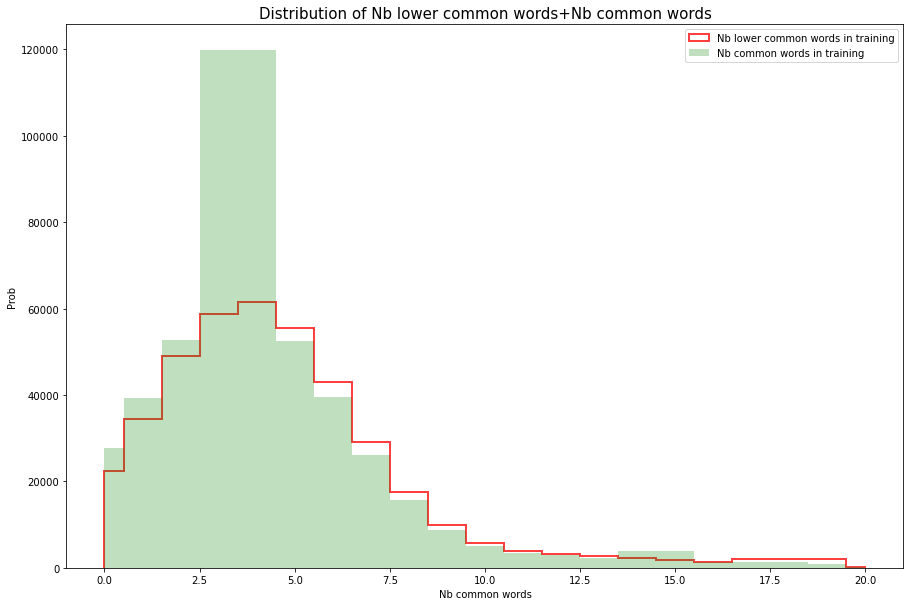

In [5]:
from astropy.visualization import hist as as_hist

nb_changed = int(numpy.where(lower_train_dataframe['lower_nb_common_words']!=lower_train_dataframe['nb_common_words'],1,0).sum())
print_info('We have changed %.2f %% of field "nb_common_words" !!' % (nb_changed*100./len(lower_train_dataframe)))

from astropy.visualization import hist

#sns.histplot(lower_training_dataframe['lower_nb_common_words'],stat='count',bins=50)
#sns.histplot(lower_training_dataframe['nb_common_words'],color="g",alpha=0.5,bins=50,legend=True)
#sns.histplot(lower_training_dataframe['lower_nb_common_words'],color="r",alpha=0.5,bins=50,legend=True)

plot.figure(figsize=(15, 10))
as_hist(lower_train_dataframe['lower_nb_common_words'],bins="blocks",range=[0,20],density=False,color='r',label="Nb lower common words in training",alpha=0.75,histtype='step',lw=2)
as_hist(lower_train_dataframe['nb_common_words'],bins="blocks",range=[0,20],density=False,color='g',label="Nb common words in training",alpha=0.25,histtype='bar',lw=2)
plot.title('Distribution of Nb lower common words+Nb common words', fontsize=15)
plot.xlabel('Nb common words')
plot.ylabel('Prob')
plot.legend()

&lt;matplotlib.legend.Legend at 0x7fc4fc6ca0a0&gt;

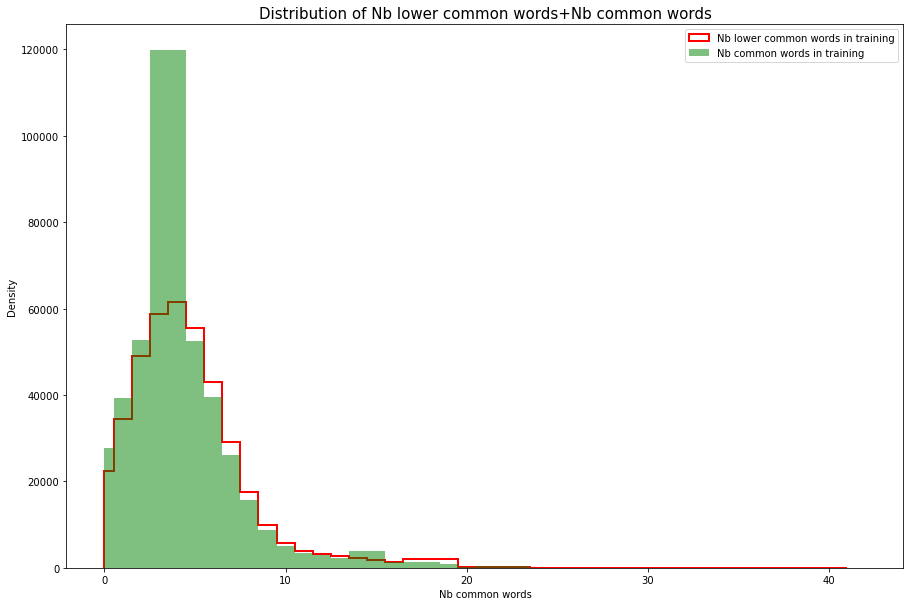

In [6]:


#sns.histplot(lower_training_dataframe['lower_nb_common_words'],stat='count',bins=50)
#sns.histplot(lower_training_dataframe['nb_common_words'],color="g",alpha=0.5,bins=50,legend=True)
#sns.histplot(lower_training_dataframe['lower_nb_common_words'],color="r",alpha=0.5,bins=50,legend=True)

plot.figure(figsize=(15, 10))
as_hist(lower_train_dataframe['lower_nb_common_words'],label="Nb lower common words in training",histtype='step',bins='blocks',density=False,color="r",lw=2)
as_hist(lower_train_dataframe['nb_common_words'],label="Nb common words in training",histtype='bar',alpha=0.5,lw=5,bins='blocks',density=False,color="g")
plot.title('Distribution of Nb lower common words+Nb common words', fontsize=15)
plot.xlabel('Nb common words')
plot.ylabel('Density')
plot.legend()




## Remove a first set of stopwords
### We start with nltk stopwords

In [7]:
from nltk.corpus import stopwords

def remove_stop_words(dataframe):
    print_warning('Remove stopwords from question 1 & question2')
    add_column_from_column(dataframe,'no_stopword_question1','lower_question1',lambda q: ' '.join([word for word in q.split() if word not in nltk_stopwords]))
    add_column_from_column(dataframe,'no_stopword_question2','lower_question2',lambda q: ' '.join([word for word in q.split() if word not in nltk_stopwords]))
    
    add_column_from_column(dataframe,'no_stopword_nb_words_question1','no_stopword_question1',lambda x: len(x.split()))
    add_column_from_column(dataframe,'no_stopword_nb_words_question2','no_stopword_question2',lambda x: len(x.split()))

    print_warning('Compute Nb common_words between question1 & question2')
    add_column_from_columns(dataframe,'no_stopword_common_words',lambda r: list(set(r.no_stopword_question1.split())&set(r.no_stopword_question2.split())))
    add_column_from_column(dataframe,'no_stopword_nb_common_words','no_stopword_common_words',len)

    print_warning('Compute Nb common words/nb words in question1')
    add_column_from_columns(dataframe,'no_stopword_nb_common_words/no_stopword_nb_words_question1',lambda r: r.no_stopword_nb_common_words/max(1,r.no_stopword_nb_words_question1))

    print_warning('Compute Nb common words/nb words in question2')
    add_column_from_columns(dataframe,'no_stopword_nb_common_words/no_stopword_nb_words_question2',lambda r: r.no_stopword_nb_common_words/max(1,r.no_stopword_nb_words_question2))

    print_warning('Compute Nb words in question1,question2 not in common words')
    add_column_from_columns(dataframe,'no_stopword_nb_words_question1-no_stopword_common_words',lambda r: len(list(set(r.no_stopword_question1.split())-set(r.no_stopword_common_words))))
    add_column_from_columns(dataframe,'no_stopword_nb_words_question2-no_stopword_common_words',lambda r: len(list(set(r.no_stopword_question2.split())-set(r.no_stopword_common_words))))

    print_warning('Compute (nb common words)/(nb words in question1+nb word in question2)')
    add_column_from_columns(
        dataframe,
        'no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)',
        lambda r: r.no_stopword_nb_common_words/max(1,(r.no_stopword_nb_words_question1+r.no_stopword_nb_words_question2)))
    dataframe=dataframe.drop(columns='no_stopword_common_words')
    return dataframe

nltk_stopwords = set(stopwords.words('english'))
print_info( 'There is %d stopwords in nltk' % len(nltk_stopwords))

stopwords_train_dataframe = load_or_build_dataframe('Removing stopwords','training_basic_feature_no_stopwords',remove_stop_words,lower_train_dataframe)
stopwords_challenge_dataframe = load_or_build_dataframe('Removing stopwords','challenge_basic_feature_no_stopwords',remove_stop_words,lower_challenge_dataframe)

nb_changed_train = int(numpy.where(stopwords_train_dataframe['no_stopword_nb_common_words']!=train_dataframe['nb_common_words'],1,0).sum())
print_info('We have changed %.2f %% of nb common_words in training!!' % (nb_changed_train*100./len(train_dataframe)))
nb_changed_challenge = int(numpy.where(stopwords_challenge_dataframe['no_stopword_nb_common_words']!=challenge_dataframe['nb_common_words'],1,0).sum())
print_info('We have changed %.2f %% of nb common_words in challenge !!' % (nb_changed_challenge*100./len(challenge_dataframe)))



&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

In [8]:
print_section('New columns added')
print_info(str([c for c in lower_train_dataframe.columns if c not in train_dataframe.columns]))
print_info('then')
print_info(str([c for c in stopwords_train_dataframe.columns if c not in lower_train_dataframe.columns]))

display(stopwords_train_dataframe.head(2).transpose())


&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

0  \
id                                                                                                                                                            0   
qid1                                                                                                                                                          1   
qid2                                                                                                                                                          2   
question1                                                                                    What is the step by step guide to invest in share market in india?   
question2                                                                                             What is the step by step guide to invest in share market?   
is_duplicate                                                                                                                                                  0   
nb_words_question1                                                                                                                                           14   
nb_words_question2                                                                                                                                           12   
nb_common_words                                                                                                                                              10   
nb_common_words/nb_words_question1                                                                                                                     0.714286   
nb_common_words/nb_words_question2                                                                                                                     0.833333   
nb_words_question1-common_words                                                                                                                               2   
nb_words_question2-common_words                                                                                                                               1   
nb_common_words/(nb_words_question1+nb_words_question2)                                                                                                0.384615   
lower_question1                                                                              what is the step by step guide to invest in share market in india?   
lower_question2                                                                                       what is the step by step guide to invest in share market?   
lower_nb_words_question1                                                                                                                                     14   
lower_nb_words_question2                                                                                                                                     12   
lower_nb_common_words                                                                                                                                        10   
lower_nb_common_words/lower_nb_words_question1                                                                                                         0.714286   
lower_nb_common_words/lower_nb_words_question2                                                                                                         0.833333   
lower_nb_words_question1-common_words                                                                                                                         2   
lower_nb_words_question2-common_words                                                                                                                         1   
lower_nb_common_words/(lower_nb_words_question1+lower_nb_words_question2)                                                                              0.384615   
no_stopword_question1                                                              

&lt;matplotlib.legend.Legend at 0x7fc4fc64d730&gt;

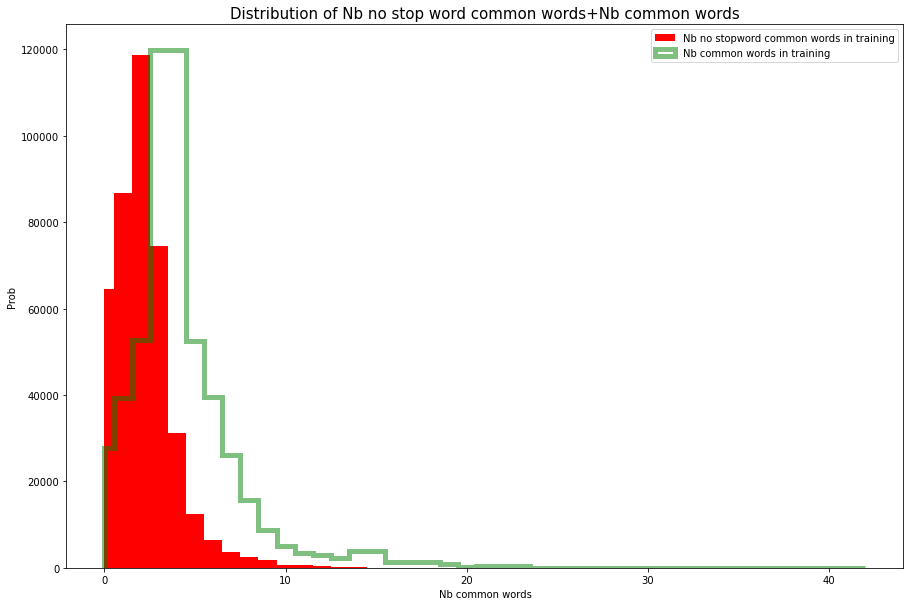

In [9]:
from astropy.visualization import hist as as_hist

#sns.histplot(lower_training_dataframe['lower_nb_common_words'],stat='count',bins=50)
#sns.histplot(lower_training_dataframe['nb_common_words'],color="g",alpha=0.5,bins=50,legend=True)
#sns.histplot(lower_training_dataframe['lower_nb_common_words'],color="r",alpha=0.5,bins=50,legend=True)

plot.figure(figsize=(15, 10))
as_hist(stopwords_train_dataframe['no_stopword_nb_common_words'],label="Nb no stopword common words in training",histtype='stepfilled',bins='blocks',density=False,color="r")
as_hist(train_dataframe['nb_common_words'],label="Nb common words in training",histtype='step',alpha=0.5,lw=5,bins='blocks',density=False,color="g")
plot.title('Distribution of Nb no stop word common words+Nb common words', fontsize=15)
plot.xlabel('Nb common words')
plot.ylabel('Prob')
plot.legend()

### Let's remove some useless data

In [10]:
all_lower_cols = [n for n in stopwords_train_dataframe.columns if 'lower' in n]
stopwords_train_dataframe = stopwords_train_dataframe.drop(columns=all_lower_cols)
assert 'lower_nb_common_words' not in stopwords_train_dataframe.columns

stopwords_challenge_dataframe = stopwords_challenge_dataframe.drop(columns=all_lower_cols)
assert 'lower_nb_common_words' not in stopwords_challenge_dataframe.columns

print_section('Here are our data')
display(stopwords_train_dataframe.head(2).transpose())
del train_dataframe
del lower_train_dataframe
del challenge_dataframe
del lower_challenge_dataframe


&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

0  \
id                                                                                                                                                            0   
qid1                                                                                                                                                          1   
qid2                                                                                                                                                          2   
question1                                                                                    What is the step by step guide to invest in share market in india?   
question2                                                                                             What is the step by step guide to invest in share market?   
is_duplicate                                                                                                                                                  0   
nb_words_question1                                                                                                                                           14   
nb_words_question2                                                                                                                                           12   
nb_common_words                                                                                                                                              10   
nb_common_words/nb_words_question1                                                                                                                     0.714286   
nb_common_words/nb_words_question2                                                                                                                     0.833333   
nb_words_question1-common_words                                                                                                                               2   
nb_words_question2-common_words                                                                                                                               1   
nb_common_words/(nb_words_question1+nb_words_question2)                                                                                                0.384615   
no_stopword_question1                                                                                                step step guide invest share market india?   
no_stopword_question2                                                                                                      step step guide invest share market?   
no_stopword_nb_words_question1                                                                                                                                7   
no_stopword_nb_words_question2                                                                                                                                6   
no_stopword_nb_common_words                                                                                                                                   4   
no_stopword_nb_common_words/no_stopword_nb_words_question1                                                                                             0.571429   
no_stopword_nb_common_words/no_stopword_nb_words_question2                                                                                             0.666667   
no_stopword_nb_words_question1-no_stopword_common_words                                                                                                       2   
no_stopword_nb_words_question2-no_stopword_common_words                                                                                                       1   
no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)                                                            0.307692   

                                                                                  

## Challenge and training are not equivalent

% of duplicate in training is not the same in challenge !
We don't have the challenge's answer but by scoring a constant prediction and using logloss definition, we can guess the distribution of duplicates in challenge

It's 17.46 %

To fix that we can:

* duplicate some negative cases in training to match challenge distribution
* use weights : each case has a weight !=1 and all algorithms are supposed to be able to deal with that info
I choose to use weights (less memory needed ?)

In [11]:
# return the weight for 0 and weight for 1 needed to rebalance dataframe like challenge
def balanced_weights(dataframe,expected_positive_ratio):
    current_positive_ratio = dataframe['is_duplicate'].sum()/len(dataframe)
    weight_for_negative = (1-expected_positive_ratio)/(1-current_positive_ratio)
    weight_for_positive = expected_positive_ratio/current_positive_ratio
    return weight_for_positive,weight_for_negative
    return 1,


CHALLENGE_DUPLICATE_PERCENT = 0.1746
print_warning('OUPS !! %% of duplicates in train is %.3f. In challenge it is %.3f %%' % (stopwords_train_dataframe['is_duplicate'].sum()/len(stopwords_train_dataframe),CHALLENGE_DUPLICATE_PERCENT))

# create a new 'weight' column to training dataset
# Do not forget to remove this column from features !!!
print_warning("let's add some weights to rebalance the data")
weight_for_1,weight_for_0 = balanced_weights(stopwords_train_dataframe,CHALLENGE_DUPLICATE_PERCENT)
print_info('Weight for positive case %.3f' % weight_for_1)
print_info('Weight for negative case %.3f' % weight_for_0)
stopwords_train_dataframe['weight'] = stopwords_train_dataframe['is_duplicate'].map( {0:weight_for_0, 1:weight_for_1})

assert int(stopwords_train_dataframe['weight'].sum()/len(stopwords_train_dataframe)) == 1, "training dataset has not been properly rebalanced"
print_info("Training data set has been properly rebalanced")
print_info('Weights distribution:')
stopwords_train_dataframe['weight'].describe()

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

count    404290.000000
mean          1.000000
std           0.403239
min           0.472917
25%           0.472917
50%           1.308493
75%           1.308493
max           1.308493
Name: weight, dtype: float64

## Compute AUC of these basic features and try to figure if there is a bit of information inside each one

ie is it helping to separate 1 from 0?

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

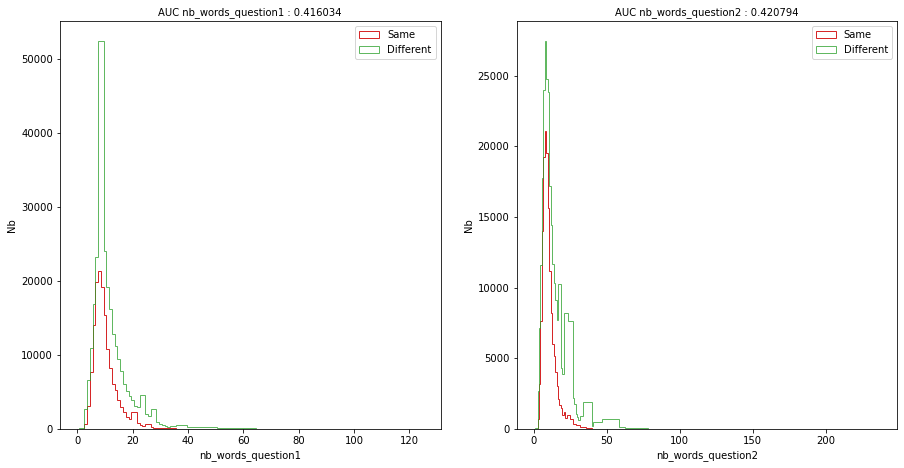

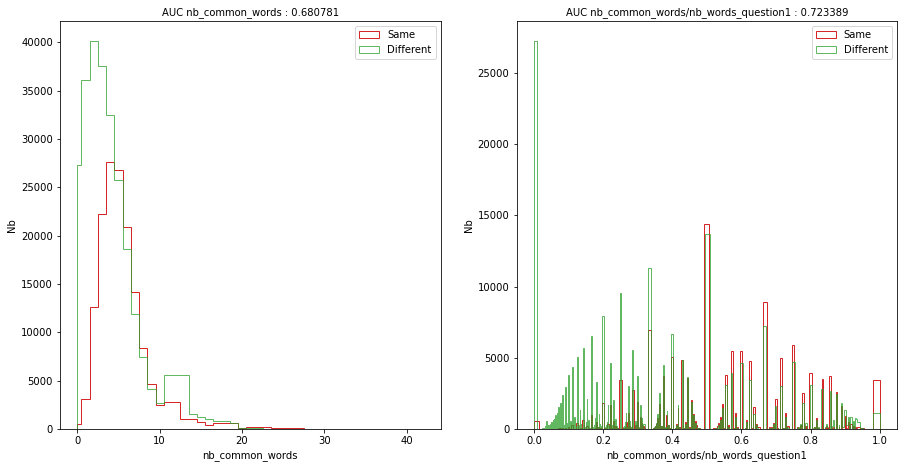

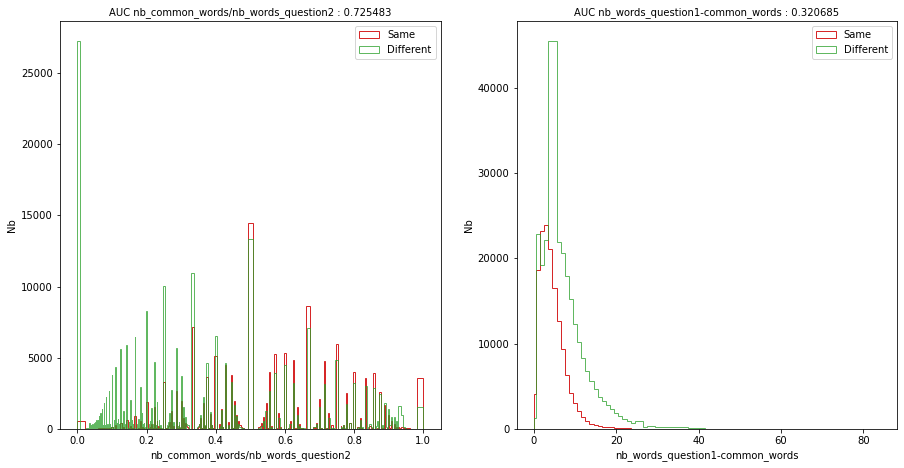

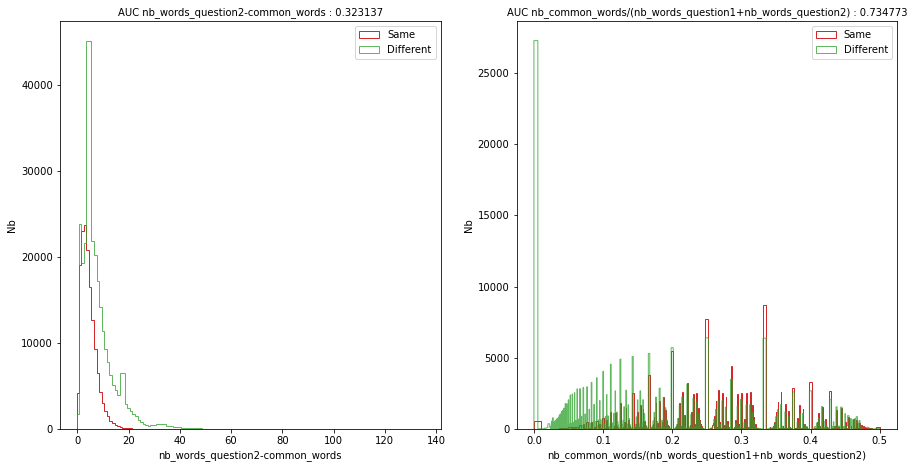

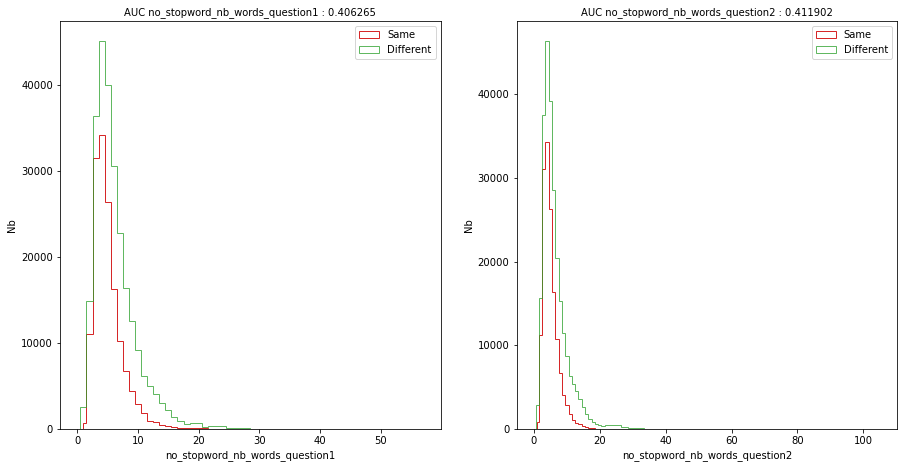

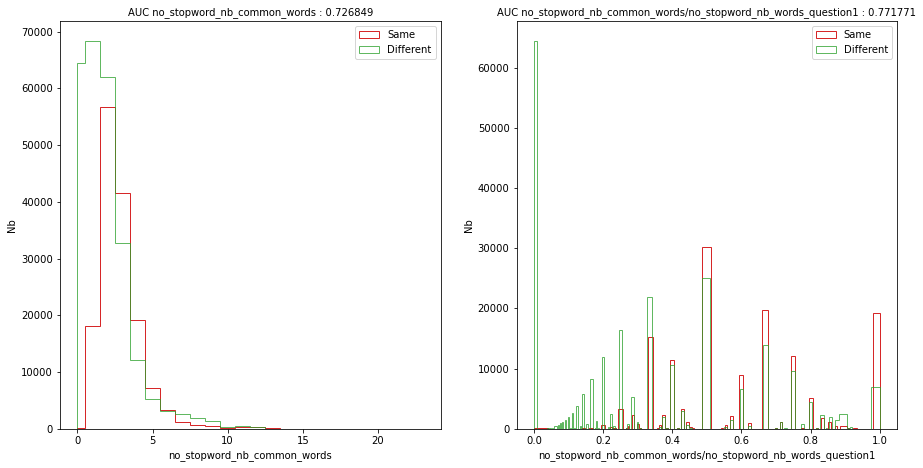

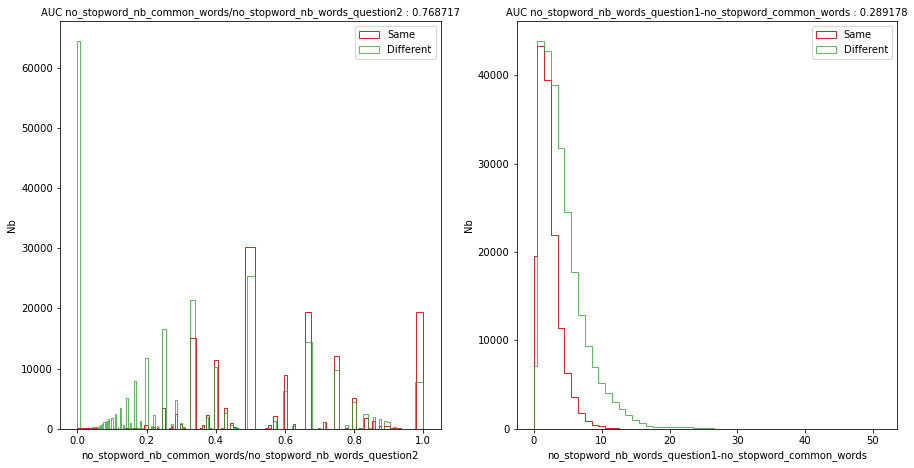

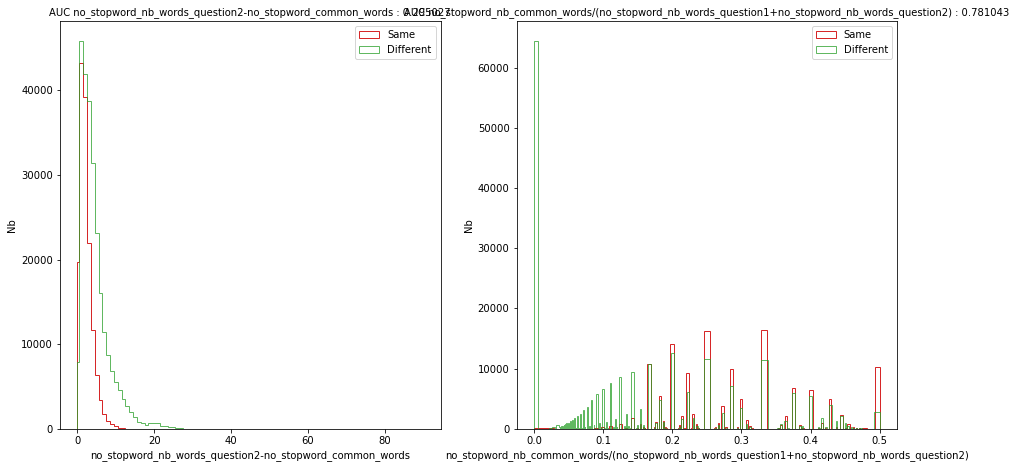

In [12]:
from sklearn.metrics import roc_auc_score

def simple_AUC(dataframe,column_name):
    return roc_auc_score(y_true=dataframe['is_duplicate'],y_score=dataframe[column_name])

def simple_weighted_AUC(dataframe,column_name):
    return roc_auc_score(y_true=dataframe['is_duplicate'],y_score=dataframe[column_name],sample_weight=dataframe['weight'])

def show_AUC(dataframe,column_name):
    if 'weight' in dataframe.columns:
        print_bullet('Weighted AUC %s %f' % (column_name,simple_weighted_AUC(dataframe,column_name)))
    else:
        print_bullet('AUC %s %f' % (column_name,simple_AUC(dataframe,column_name)))
        

def display_simple_AUC(dataframe,column_name):
    palette = sns.color_palette()
    # Let multiplot_generator figure the size
    #plot.figure(figsize=(10, 7))
    #plot.hist(dataframe[column_name][dataframe['is_duplicate']==1],bins=50,color=palette[3],label='Same',histtype='step')
    #plot.hist(dataframe[column_name][dataframe['is_duplicate']==0],bins=50,color=palette[2],label='Different',alpha = 0.75,histtype='step')
    as_hist(dataframe[column_name][dataframe['is_duplicate']==1],bins="blocks",color=palette[3],label='Same',histtype='step')
    as_hist(dataframe[column_name][dataframe['is_duplicate']==0],bins="blocks",color=palette[2],label='Different',alpha = 0.75,histtype='step')
    plot.title('AUC %s : %f' % (column_name,simple_AUC(dataframe,column_name)) , fontsize=10)
    plot.xlabel(column_name)
    plot.ylabel('Nb')
    plot.legend()



def show_all_simple_AUC(dataframe):
    all =  all_numeric_columns(dataframe)
    print_section( 'Show AUC on %d unique features' % len(all))
    for name in all:
        show_AUC(dataframe,name)
        yield
        display_simple_AUC(dataframe,name)
    print_done('Done')


def show_all_simple_AUC_in_grid(dataframe,nb_columns=2):
    multiplot_from_generator(show_all_simple_AUC(dataframe), nb_columns)

show_all_simple_AUC_in_grid(stopwords_train_dataframe,nb_columns=2)

## OK Visualising these AUC is cool
Can we have some numbers ?

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

is_duplicate                                                                                   1.000000
no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)    0.457270
no_stopword_nb_common_words/no_stopword_nb_words_question1                                     0.446184
no_stopword_nb_common_words/no_stopword_nb_words_question2                                     0.440840
nb_common_words/(nb_words_question1+nb_words_question2)                                        0.370994
nb_common_words/nb_words_question2                                                             0.359681
nb_common_words/nb_words_question1                                                             0.358852
no_stopword_nb_words_question1-no_stopword_common_words                                        0.336392
no_stopword_nb_words_question2-no_stopword_common_words                                        0.321713
nb_words_question1-common_words                                 

&lt;IPython.core.display.HTML object&gt;

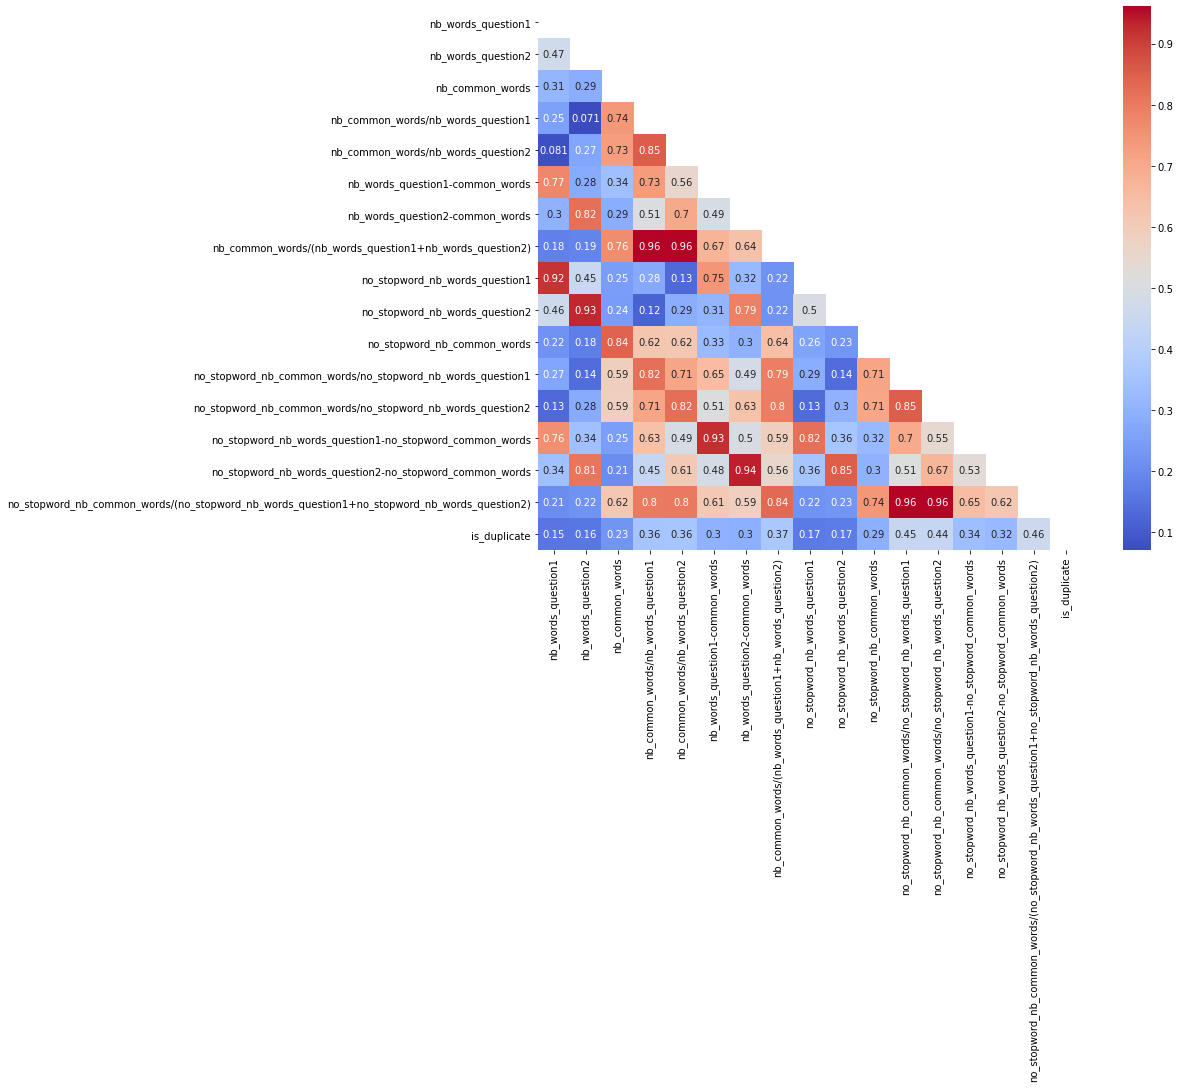

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

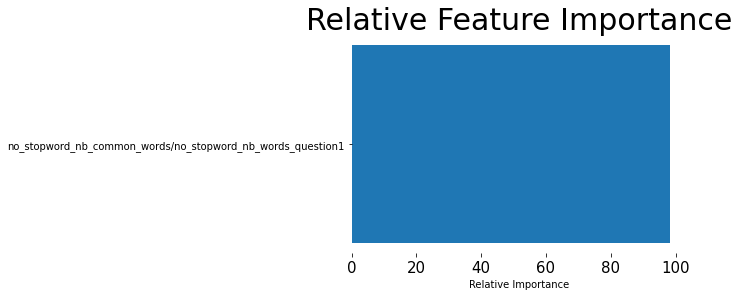

&lt;IPython.core.display.HTML object&gt;

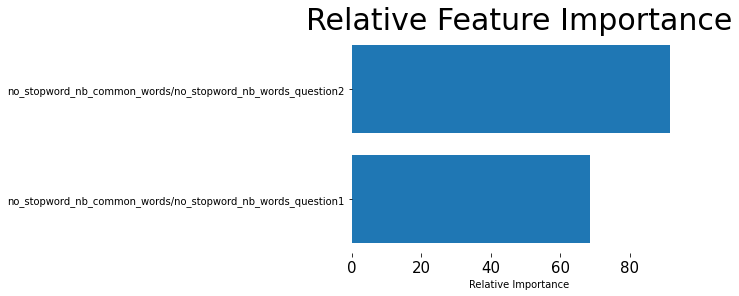

&lt;IPython.core.display.HTML object&gt;

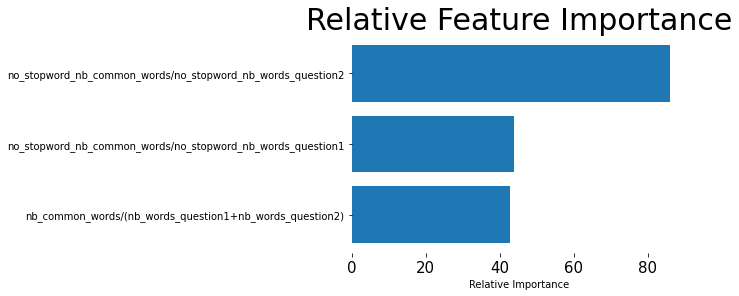

&lt;IPython.core.display.HTML object&gt;

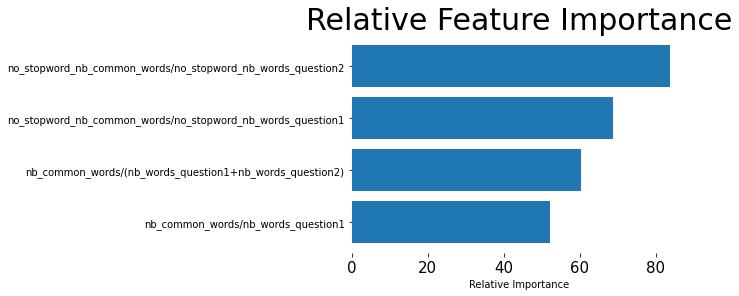

&lt;IPython.core.display.HTML object&gt;

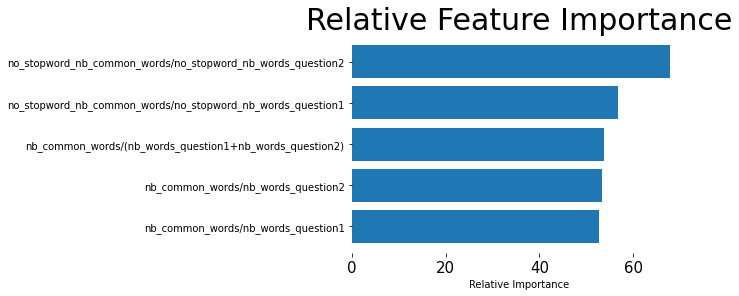

&lt;IPython.core.display.HTML object&gt;

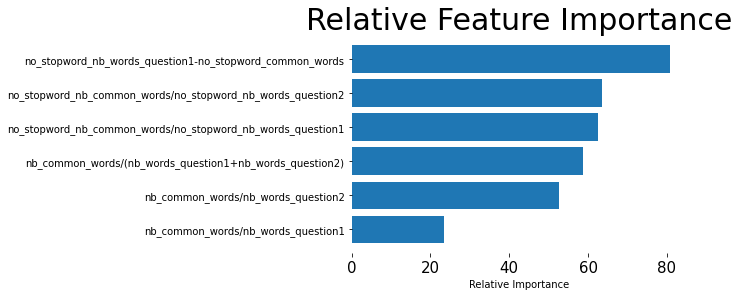

&lt;IPython.core.display.HTML object&gt;

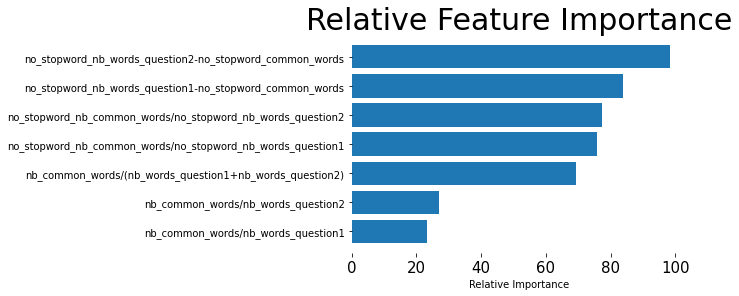

&lt;IPython.core.display.HTML object&gt;

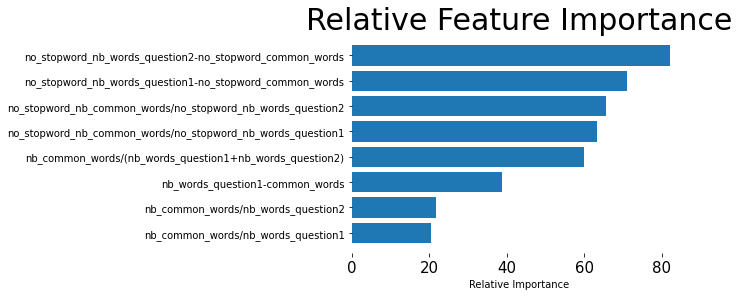

&lt;IPython.core.display.HTML object&gt;

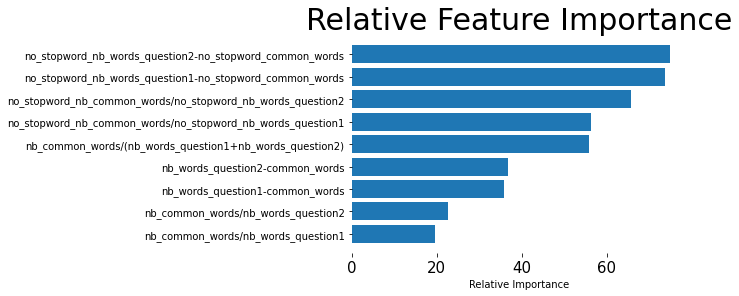

&lt;IPython.core.display.HTML object&gt;

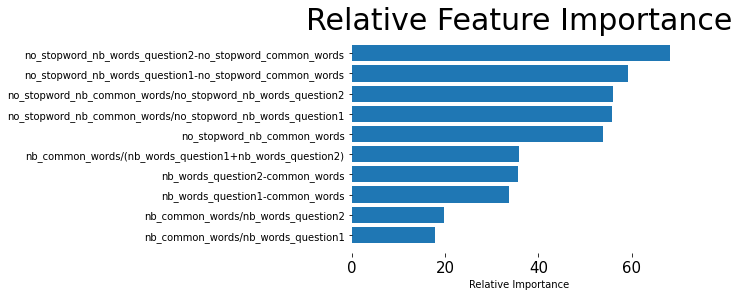

&lt;IPython.core.display.HTML object&gt;

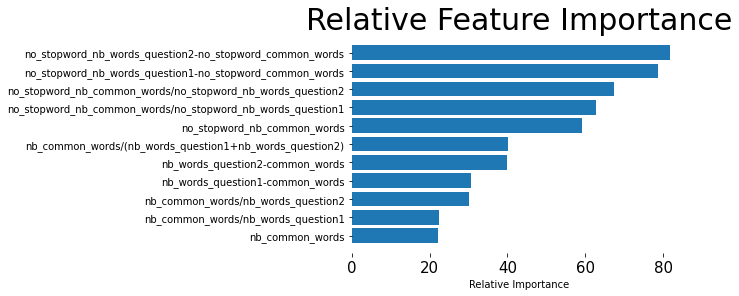

&lt;IPython.core.display.HTML object&gt;

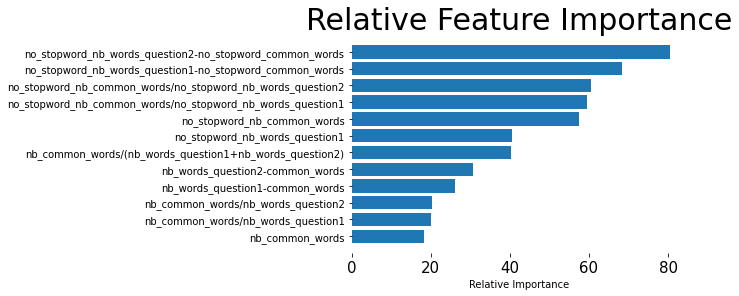

&lt;IPython.core.display.HTML object&gt;

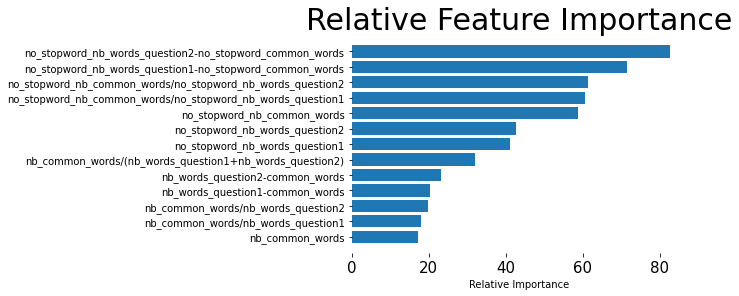

&lt;IPython.core.display.HTML object&gt;

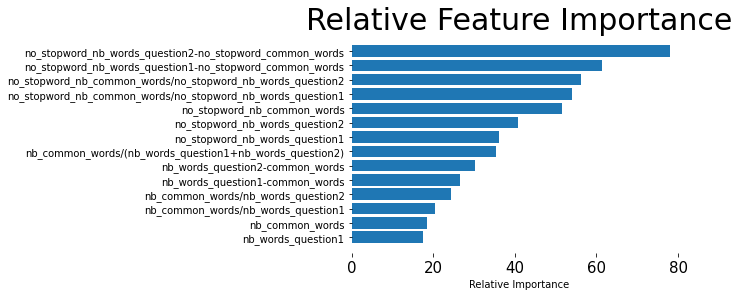

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

[ 3  4  7 11 12 15]
[0.1376836  0.13600216 0.18711631 0.153584   0.15174113 0.23387279]


&lt;IPython.core.display.HTML object&gt;

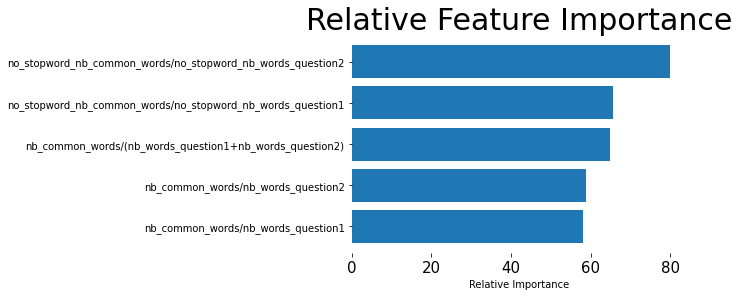

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

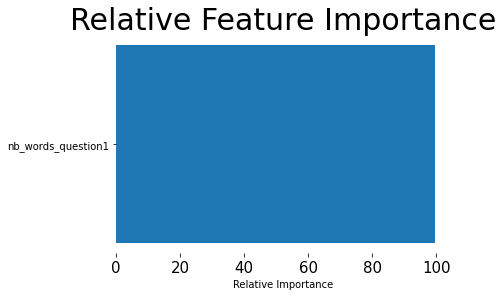

&lt;IPython.core.display.HTML object&gt;

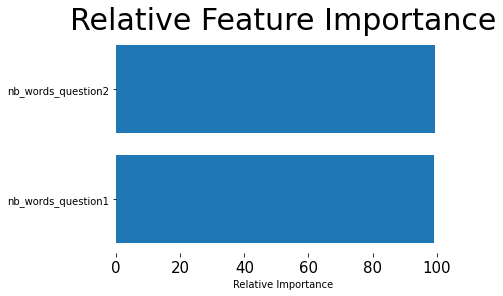

&lt;IPython.core.display.HTML object&gt;

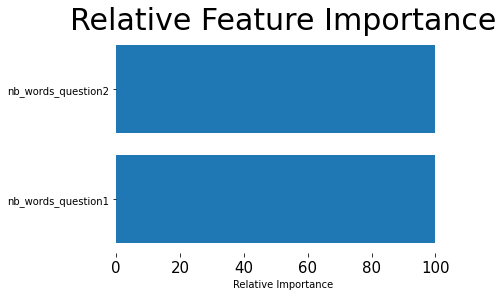

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

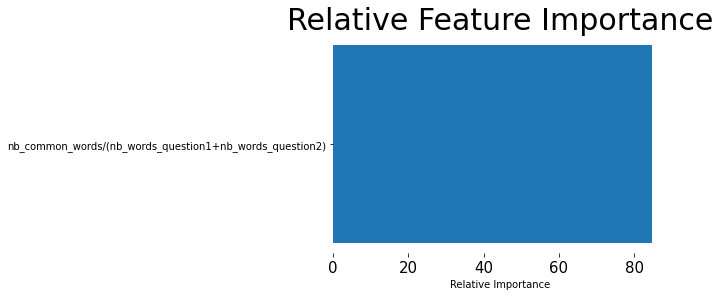

&lt;IPython.core.display.HTML object&gt;

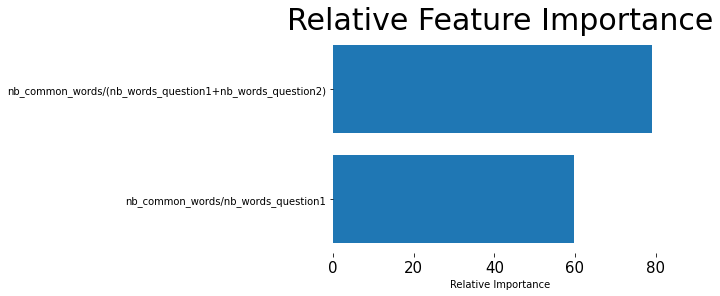

&lt;IPython.core.display.HTML object&gt;

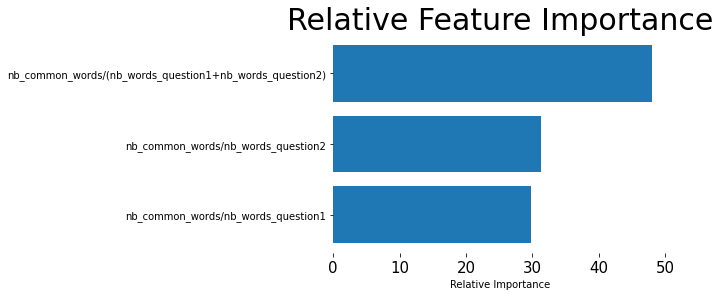

&lt;IPython.core.display.HTML object&gt;

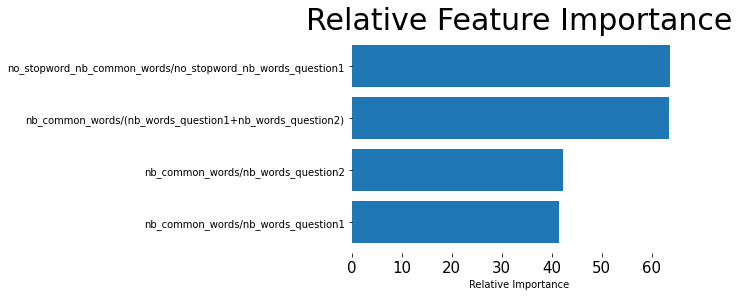

&lt;IPython.core.display.HTML object&gt;

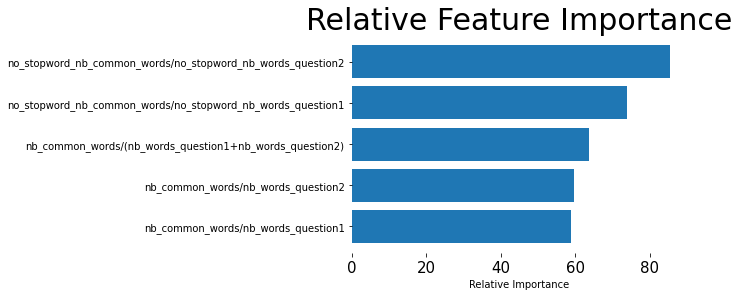

&lt;IPython.core.display.HTML object&gt;

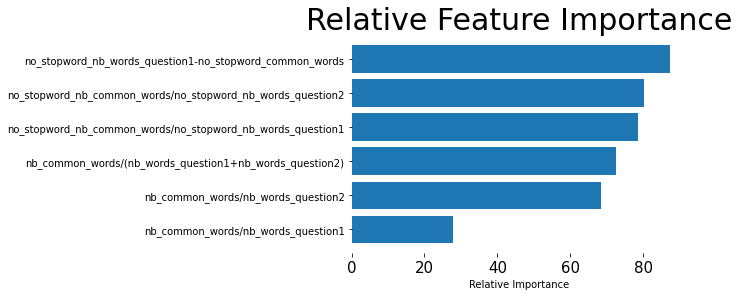

&lt;IPython.core.display.HTML object&gt;

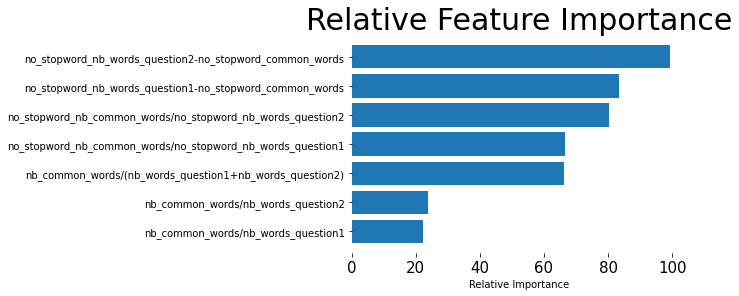

&lt;IPython.core.display.HTML object&gt;

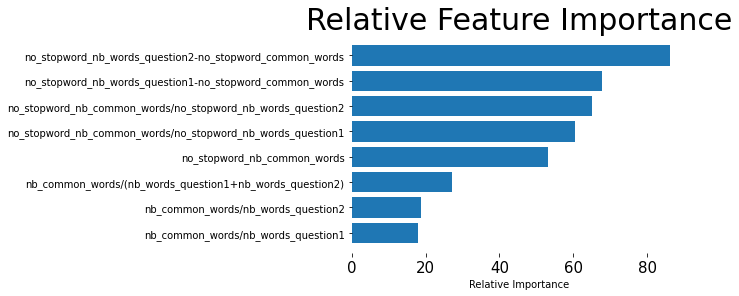

&lt;IPython.core.display.HTML object&gt;

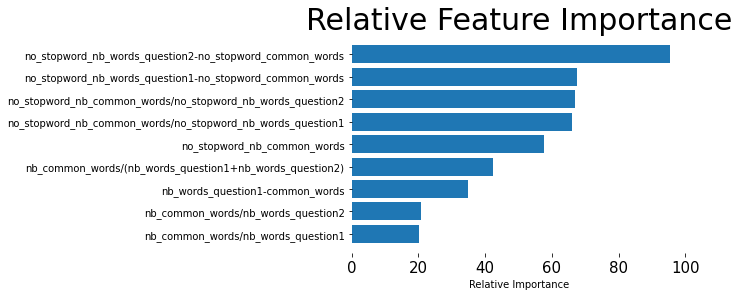

&lt;IPython.core.display.HTML object&gt;

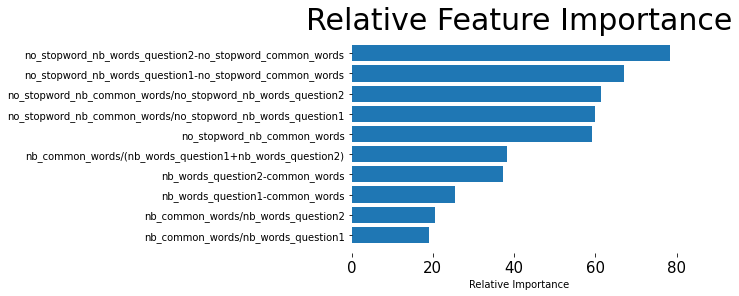

&lt;IPython.core.display.HTML object&gt;

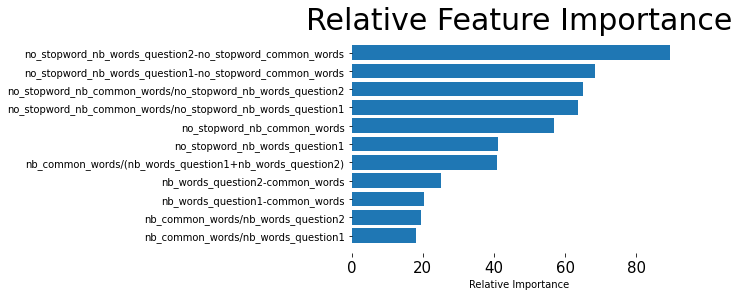

&lt;IPython.core.display.HTML object&gt;

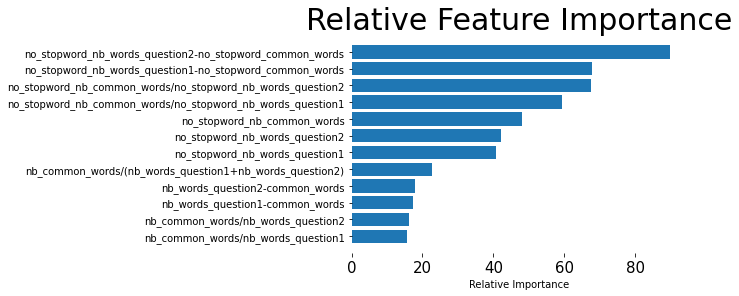

&lt;IPython.core.display.HTML object&gt;

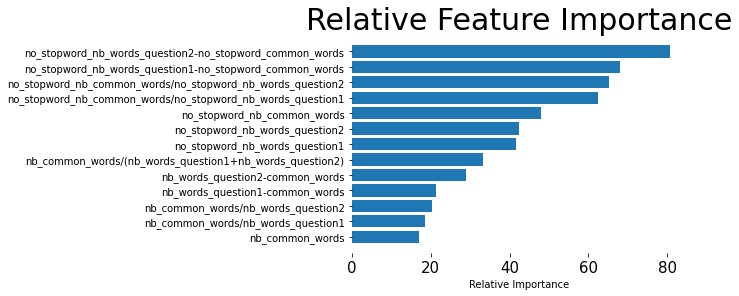

&lt;IPython.core.display.HTML object&gt;

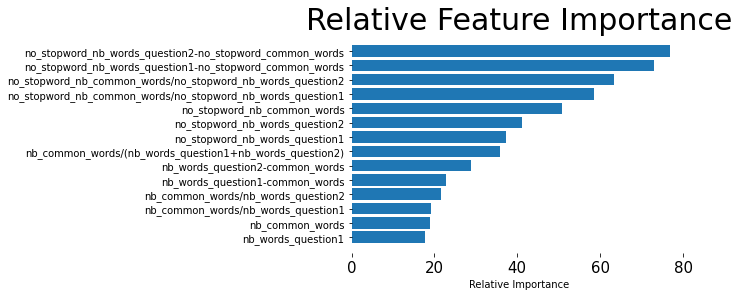

&lt;IPython.core.display.HTML object&gt;

In [13]:

from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest,f_classif,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

def graph_relative_feature_importance(features_importances,columns):
    # Make importances relative to max importance.
    features_importances = 100.0 * (features_importances / features_importances.max())
    sorted_idx = numpy.argsort(features_importances)
    sorted_idx = sorted_idx[-20:-1:1]
    pos = numpy.arange(sorted_idx.shape[0]) + 0.5
    plot.barh(pos, features_importances[sorted_idx], align='center')
    plot.yticks(pos, columns)
    plot.xlabel('Relative Importance')
    plot.title('Relative Feature Importance', fontsize=30)
    plot.tick_params(axis='x', which='major', labelsize=15)
    sns.despine(left=True, bottom=True)
    plot.show()

def graph_feature_importance(features_importances,columns):
    # Make importances relative to max importance.
    sorted_idx = numpy.argsort(features_importances)
    sorted_idx = sorted_idx[-20:]
    pos = numpy.arange(sorted_idx.shape[0]) + 0.5
    plot.barh(pos, features_importances[sorted_idx], align='center')
    plot.yticks(pos, columns)
    plot.xlabel('Importance')
    plot.title('Feature Importance', fontsize=30)
    plot.tick_params(axis='x', which='major', labelsize=15)
    #sns.despine(left=True, bottom=True)
    plot.show()

def independant_features_analysis(name_data,input_df,target_df):
    train_df = input_df[all_numeric_columns(input_df)]
    target_df = target_df
    small = int(len(target_df)*0.05)
    small_train = train_df.sample(small,random_state=42)
    small_target = target_df.sample(small,random_state=42)
    small_weights = input_df[WEIGHT].sample(small,random_state=42)

    # be careful all_numeric will include also the target soon
    all_numeric = all_numeric_columns(input_df)
    print_section('Minimal analysis of numeric features of %s' % name_data)
    print_info('Nb features: %d' % len(all_numeric))
    print_info(str(all_numeric))
    print_warning('Is there any null value ? %s' % input_df.isnull().any().any())

    compute_variances = feature_selection.VarianceThreshold()
    all_numeric.append('is_duplicate')
    variances = compute_variances.fit_transform(input_df[all_numeric])
    print_warning('Is there any low variance feature ? %s' % str(variances.shape[1]!=len(all_numeric)))
    print_info('Here are the correlations to the target "is_duplicate"')
    correlation_matrix = input_df[all_numeric].corr().abs()
    print(correlation_matrix['is_duplicate'].nlargest(len(all_numeric)))

    correlation_matrix_without_is_duplicate = correlation_matrix['is_duplicate'][correlation_matrix['is_duplicate']<1]
    highest_correlated_feature = correlation_matrix_without_is_duplicate.nlargest(1).index[0]
    highest_correlation = correlation_matrix_without_is_duplicate.nlargest(1)[0]
    if highest_correlation >0.2:
        if highest_correlation < 0.5:
            print_warning('%s is the most correlated with target but %f is quite weak' % (highest_correlated_feature,highest_correlation))
        else:
            print_info('%s is the most correlated with target but %f is very weak' % (highest_correlated_feature,highest_correlation))
    else:
        print_alert('%s is the most correlated with target and %f is quite big' % (highest_correlated_feature,highest_correlation))
    plot.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix,annot=True,cbar=True,square=True,cmap='coolwarm',mask = numpy.triu(correlation_matrix))
    plot.show()

    # we keep only numeric features and remove is_duplicate
    all_numeric = all_numeric_columns(input_df)

    print_section('Here are the features that would be selected with a simple univariate analysis')
    start = time.time()
    for r in tqdm(range(1,len(all_numeric))):
        k_best = SelectKBest(score_func=f_classif,k=r)
        fit = k_best.fit(small_train,small_target)
        best_columns = [small_train.columns[c] for c in fit.get_support(indices=True)]
        print_info('Nb features to keep %d:%s' %(r,best_columns))
        
        # Can we graph relative importances
        if r>1:
            # transform train set so we can compute importances
            univariate_features = fit.transform(small_train)
            rfc = RandomForestClassifier(n_estimators=100)
            rfc_scores = cross_val_score(rfc, univariate_features, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
            features_importance = rfc.fit(univariate_features, small_target).feature_importances_
            graph_relative_feature_importance(features_importance,best_columns)
    print_done('Done',top=start)
    
    print_section('Here are the features that would be selected a priori from default Multinomial Naive Bayes')
    start = time.time()   
    mnb = MultinomialNB()
    best_from_model = feature_selection.SelectFromModel(mnb)
    fit = best_from_model.fit(small_train,small_target,sample_weight=small_weights)
    print(fit.get_support(indices=True))
    best_columns = [small_train.columns[c] for c in fit.get_support(indices=True)]
    # transform train set so we can compute importances
    mnb_features = fit.transform(small_train)
    rfc = RandomForestClassifier(n_estimators=100)
    rfc_scores = cross_val_score(rfc, mnb_features, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
    features_importance = rfc.fit(mnb_features, small_target).feature_importances_
    print(features_importance)
    print_info('features to keep :%s logloss %.4f %.4f' %(best_columns,-rfc_scores.mean(),rfc_scores.std()))
    graph_relative_feature_importance(features_importance,best_columns)
    print_done('Done',top=start)
    

    print_info('Try to keep x \% of variance with a PCA')
    print_alert('bug ?')
    start = time.time()
    for r in tqdm([.8,.9,.95]):
        acp = PCA(r)
        principal_components = acp.fit_transform(small_train)
        principal_df = pandas.DataFrame(principal_components).sample(small,random_state=42)
        rfc = RandomForestClassifier(n_estimators=100)
        rfc_scores = cross_val_score(rfc, principal_df, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
        features_importance = rfc.fit(principal_df, small_target).feature_importances_
        print_info('%% of variance %f:%s' %(r,'aie'))
        graph_relative_feature_importance(features_importance,small_train.columns)
    print_done('Done',top=start)

    print_section('Here are the features that would be selected with a recursive feature elimination')
    start = time.time()
    print_alert('Doomed to fail : RFE does not support to transmit ,sample_weight=small_weights')
    print_alert('ix is waiting since 2016 ?')
    for r in tqdm(range(1,len(all_numeric))):
        mnb = MultinomialNB()
        recursive_best= feature_selection.RFE(mnb, n_features_to_select=r)
        fit = recursive_best.fit(small_train,small_target)
        best_columns = [small_train.columns[c] for c in fit.get_support(indices=True)]
        print_info('Nb features to keep %d:%s' %(r,best_columns))
        
        # Can we graph relative importances
        if r>1:
            # transform train set so we can compute importances
            recursive_features = fit.transform(small_train)
            rfc = RandomForestClassifier(n_estimators=100)
            rfc_scores = cross_val_score(rfc, recursive_features, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
            features_importance = rfc.fit(recursive_features, small_target).feature_importances_
            graph_relative_feature_importance(features_importance,best_columns)
    print_done('Done',top=start)
   


independant_features_analysis('train',stopwords_train_dataframe,stopwords_train_dataframe['is_duplicate'])



## Previous exploration of all combination of features was not very successfull and very heavy
### Let's try another strategy : on a given 'theme' of fields, add each field one by one to a model

In [14]:
# Simple XGBoost code
# 

import xgboost 

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta' : 0.02,
    'max_depth':3 
    }



def print_res_xgboost(infos):
    # Glurk
    print_info(' | '.join([('%s '+f) % (k,infos[k]) for k,f in INFO_XGBOOST_MODEL.items() if k in infos]))

# 80% training 20% validation
def build_XGBoost_model_80_20(training,target,column_names,show=True):
    input_train,input_test,target_train,target_test = train_test_split(training,target,random_state=42,test_size=0.2)
    final_input_train = input_train[list(column_names)]
    final_input_test = input_test[list(column_names)]
    train_dm = xgboost.DMatrix(final_input_train, label = target_train, weight = input_train[WEIGHT],nthread = -1)
    validation_dm = xgboost.DMatrix(final_input_test, label = target_test,weight = input_test[WEIGHT])
    watchlist = [(train_dm, 'train'), (validation_dm, 'valid')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(params,train_dm,400,watchlist,early_stopping_rounds=50,verbose_eval=verbose)
    infos = compute_metrics_model_xgboost(model,final_input_test,target_test,sample_weight = input_test[WEIGHT],show=show)
    duration = time.time()-start
    infos.update({'time':duration})
    if show:      
        print_res_xgboost(infos)
    return  infos

# Pushing the limits :100 % training no validation !!
def build_XGBoost_model_100_0(training,target,column_names,show=True):
    final_train = training[list(column_names)]
    final_target = target
    final_weight = training[WEIGHT]

    train_dm = xgboost.DMatrix(final_train, label = final_target, weight = final_weight,nthread = -1)
    watchlist = [(train_dm, 'train')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(params,train_dm,400,watchlist,early_stopping_rounds=50,verbose_eval=verbose)
    duration = time.time()-start
    infos = compute_metrics_model_xgboost(model,final_train,final_target,sample_weight = final_weight,show=show)
    infos.update({'time':duration})
    if show:      
        print_res_xgboost(infos)
    return  infos

def compute_metrics_model_xgboost(model,input_df,target_df,sample_weight = None,show = True):
    final_input = xgboost.DMatrix(input_df)
    prediction_proba_df = model.predict(final_input,ntree_limit=model.best_ntree_limit)
    # Hum shouldn't we challenge this 50% threshold ?
    prediction_df = numpy.where(prediction_proba_df>0.5,1,0)
    res = metrics.classification_report(target_df,prediction_df,sample_weight = sample_weight,output_dict=True)
    accuracy = res['accuracy']
    score = res['weighted avg']['f1-score']
    logloss_proba = metrics.log_loss(target_df,prediction_proba_df,sample_weight = sample_weight)
    if show:
        print_info('Classification report')
        print(metrics.classification_report(target_df,prediction_df,sample_weight = sample_weight))
    return {
             'accuracy':accuracy,
             'score':score,
             'logloss_proba':logloss_proba,
             'model':model
           }

INFO_XGBOOST_MODEL= {
    'logloss_proba': '%.4f',
    'score': '%.4f',
    'accuracy': '%.4f',
    'time': '%.2f'
}

print_res_xgboost({'alain':1})

if UNITARY_TEST:
    print_section('Unitary test : playbox XGBoost 80_20')
    small_train = stopwords_train_dataframe.sample(1000,random_state=42)
    print_section('Unitary test : playbox XGBoost 100_0')
    res = build_XGBoost_model_100_0(small_train,small_train['is_duplicate'],all_numeric_columns(small_train))
    print(res)

if UNITARY_TEST:
    print_section('Unitary test : playbox XGBoost 80_20')
    small_train = stopwords_train_dataframe.sample(1000,random_state=42)
    print_section('Unitary test : playbox XGBoost 80_20')
    res = build_XGBoost_model_80_20(small_train,small_train['is_duplicate'],all_numeric_columns(small_train))
    print(res)

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

[0]	train-logloss:0.68215
Will train until train-logloss hasn&#39;t improved in 50 rounds.
[10]	train-logloss:0.59216
[20]	train-logloss:0.52819
[30]	train-logloss:0.48113
[40]	train-logloss:0.44558
[50]	train-logloss:0.41826
[60]	train-logloss:0.39681
[70]	train-logloss:0.37990
[80]	train-logloss:0.36630
[90]	train-logloss:0.35517
[100]	train-logloss:0.34606
[110]	train-logloss:0.33852
[120]	train-logloss:0.33235
[130]	train-logloss:0.32709
[140]	train-logloss:0.32251
[150]	train-logloss:0.31843
[160]	train-logloss:0.31487
[170]	train-logloss:0.31186
[180]	train-logloss:0.30933
[190]	train-logloss:0.30706
[200]	train-logloss:0.30500
[210]	train-logloss:0.30303
[220]	train-logloss:0.30122
[230]	train-logloss:0.29925
[240]	train-logloss:0.29670
[250]	train-logloss:0.29438
[260]	train-logloss:0.29215
[270]	train-logloss:0.29011
[280]	train-logloss:0.28819
[290]	train-logloss:0.28653
[300]	train-logloss:0.28492
[310]	train-logloss:0.28331
[320]	train-logloss:0.28155
[330]	train-logloss:0.

&lt;IPython.core.display.HTML object&gt;

              precision    recall  f1-score   support

           0       0.86      1.00      0.93 833.5098453967706
           1       0.94      0.23      0.37 171.66892895091271

    accuracy                           0.87 1005.1787743476833
   macro avg       0.90      0.62      0.65 1005.1787743476833
weighted avg       0.88      0.87      0.83 1005.1787743476833



&lt;IPython.core.display.HTML object&gt;

{&#39;accuracy&#39;: 0.8666028778273638, &#39;score&#39;: 0.8313184706150126, &#39;logloss_proba&#39;: 0.269726119669876, &#39;model&#39;: &lt;xgboost.core.Booster object at 0x7fc480de38e0&gt;, &#39;time&#39;: 0.36719346046447754}


&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

[0]	train-logloss:0.68237	valid-logloss:0.68150
Multiple eval metrics have been passed: &#39;valid-logloss&#39; will be used for early stopping.

Will train until valid-logloss hasn&#39;t improved in 50 rounds.
[10]	train-logloss:0.59414	valid-logloss:0.58665
[20]	train-logloss:0.53148	valid-logloss:0.51954
[30]	train-logloss:0.48517	valid-logloss:0.47065
[40]	train-logloss:0.45005	valid-logloss:0.43375
[50]	train-logloss:0.42298	valid-logloss:0.40576
[60]	train-logloss:0.40181	valid-logloss:0.38393
[70]	train-logloss:0.38511	valid-logloss:0.36697
[80]	train-logloss:0.37162	valid-logloss:0.35362
[90]	train-logloss:0.36065	valid-logloss:0.34298
[100]	train-logloss:0.35165	valid-logloss:0.33474
[110]	train-logloss:0.34431	valid-logloss:0.32792
[120]	train-logloss:0.33829	valid-logloss:0.32261
[130]	train-logloss:0.33327	valid-logloss:0.31836
[140]	train-logloss:0.32899	valid-logloss:0.31483
[150]	train-logloss:0.32535	valid-logloss:0.31207
[160]	train-logloss:0.32218	valid-logloss:0.3098

&lt;IPython.core.display.HTML object&gt;

              precision    recall  f1-score   support

           0       0.86      0.98      0.92 168.7955573880411
           1       0.74      0.23      0.35 33.5771183347514

    accuracy                           0.86 202.37267572279248
   macro avg       0.80      0.60      0.63 202.37267572279248
weighted avg       0.84      0.86      0.83 202.37267572279248



&lt;IPython.core.display.HTML object&gt;

{&#39;accuracy&#39;: 0.8585410354235975, &#39;score&#39;: 0.8253143525382407, &#39;logloss_proba&#39;: 0.28839631527636256, &#39;model&#39;: &lt;xgboost.core.Booster object at 0x7fc480dd24f0&gt;, &#39;time&#39;: 0.5712161064147949}


In [15]:
def find_best_result(results,metric):
    if 'logloss' in metric:
        return results.nsmallest(1,metric)
    else:
        return results.nlargest(1,metric)
        
def apply_xgboost(model,columns,input_df):
    res = pandas.DataFrame()
    res['test_id'] = input_df['test_id']
    res['is_duplicate'] = model.predict(xgboost.DMatrix(input_df[columns]))
    return res

def submit_best_result(results,input_df,file_name,kaggle_message,metric='logloss_proba'):
    start = time.time()
    print_section("Scoring XGBoost model with best %s: %s" % (metric,kaggle_message))
    csv_file_name = absolute_env_file_name(file_name,ext='.csv')
    print_info('Generating scores in %s' % csv_file_name)
    best = find_best_result(results,metric)
    model = best['model'][0]
    columns = best['columns'][0]
    prediction = apply_xgboost(model,columns,input_df)
    prediction.to_csv(csv_file_name,index=False)
    print_info('Zipping file')
    absolute_file_name_zip = zip_file_and_delete(csv_file_name)
    print_done('Done',top=start)
    print_info('%s is ready' % absolute_file_name_zip)
    print_warning('Use this commands to submit apply results to kaggle')
    print_warning('kaggle competitions submit quora-question-pairs -f "%s" -m "%s %s"' % (absolute_file_name_zip,EXPERIMENT,kaggle_message))
    return prediction

def n_columns(columns,n):
    return columns[0:n]

def xgboost_all_fields_80_20(dataframe,columns_to_explore):
    print_section("XGBoost (80,20) on 1 to %d fields" % len(columns_to_explore))
    start = time.time()
    res_final = dict()
    min_log_loss = 1000
    best = 0
    best_cols =''
    for i in tqdm(range(1,len(columns_to_explore)+1)):
        columns = n_columns(columns_to_explore,i)
        res = build_XGBoost_model_80_20(dataframe,dataframe['is_duplicate'],columns,show = False)
        cur_logloss = res['logloss_proba']
        if cur_logloss<min_log_loss:
            print_info("%d:%.4f %s" % (i,cur_logloss,columns))
            min_log_loss = cur_logloss
            best_cols = columns
            best = i
        else:
            print_warning("%d:%.4f" % (i,cur_logloss))
        res.update( {'columns':columns})
        res_final.update({str(i):res})
    print_info('Best: %d %.4f %s' % (best,min_log_loss,best_cols))
    print_done('Done',top=start)
    return pandas.DataFrame.from_dict(res_final, orient='index')

# try to reload from cache an exploration
# if not available, redo it and save results in cache
# find the best result according to a metric (default logloss_proba)
# and submit it to kaggle
def study_fields(message,tag,columns,train_df,challenge_df):
    print_section(message)
    results = load_or_build_dataframe('Rebuild XGBoost models',tag + '_results',lambda df:xgboost_all_fields_80_20(df,columns),train_df)
    save_models_dict_to_excel(results,tag=tag)
    display(results.describe())
    submit_best_result(results,challenge_df,'Best_'+tag,'Best ' + tag)
    return results


### Let's start our exploration with XGBoost (basic setup)

In [16]:
# ALL_STOP_COLUMNS= ['no_stopword_nb_common_words', 'no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)',       'no_stopword_nb_common_words/no_stopword_nb_words_question1', 'no_stopword_nb_common_words/no_stopword_nb_words_question2', 'no_stopword_nb_words_question1',       'no_stopword_nb_words_question1-no_stopword_common_words', 'no_stopword_nb_words_question2', 'no_stopword_nb_words_question2-no_stopword_common_words']

# ALL_NO_STOP_COLUMNS= ['no_stopword_nb_common_words', 'no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)',       'no_stopword_nb_common_words/no_stopword_nb_words_question1', 'no_stopword_nb_common_words/no_stopword_nb_words_question2', 'no_stopword_nb_words_question1',       'no_stopword_nb_words_question1-no_stopword_common_words', 'no_stopword_nb_words_question2', 'no_stopword_nb_words_question2-no_stopword_common_words']

# ALL_COLUMNS =[ 'nb_words_question1', 'nb_words_question2', 'nb_common_words', 'nb_common_words/nb_words_question1','nb_common_words/nb_words_question2', 'nb_words_question1-common_words', 'nb_words_question2-common_words', 'nb_common_words/(nb_words_question1+nb_words_question2)', no_stopword_nb_words_question1', 'no_stopword_nb_words_question2', 'no_stopword_nb_common_words', 'no_stopword_nb_common_words/no_stopword_nb_words_question1',       'no_stopword_nb_common_words/no_stopword_nb_words_question2', 'no_stopword_nb_words_question1-no_stopword_common_words', no_stopword_nb_words_question2-no_stopword_common_words','no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)']

# To build a model with every kind of features
ALL_COLUMNS = all_numeric_columns(stopwords_train_dataframe)
# To build a model with only features aware of stop words
ALL_STOP_COLUMNS = [c for c in all_numeric_columns(stopwords_train_dataframe) if 'stop' in c] 
# To build a model with only features not aware of stop words
ALL_NO_STOP_COLUMNS = [c for c in all_numeric_columns(stopwords_train_dataframe) if 'stop' not in c] 

xgboost_only_stop_columns_results = study_fields(
    'Only on features aware of stop words',
    'no_stop_words_features_xgboost',
    ALL_STOP_COLUMNS,
    stopwords_train_dataframe,
    stopwords_challenge_dataframe)

xgboost_only_no_stop_columns_results = study_fields(
    'Only on features not aware of stop words',
    'all_words_features_xgboost',
    ALL_NO_STOP_COLUMNS,
    stopwords_train_dataframe,
    stopwords_challenge_dataframe)

xgboost_all_columns_results = study_fields(
    'Any kind of feature',
    'all_features_xgboost',
    ALL_COLUMNS,
    stopwords_train_dataframe,
    stopwords_challenge_dataframe)

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

accuracy     score  logloss_proba       time
count  8.000000  8.000000       8.000000   8.000000
mean   0.826854  0.758320       0.374026  13.710024
std    0.001893  0.008913       0.046253   2.818499
min    0.823848  0.744278       0.345858   8.795743
25%    0.826197  0.755028       0.347029  12.435148
50%    0.827914  0.762815       0.349290  13.250671
75%    0.828065  0.763829       0.378142  15.768061
max    0.828162  0.766092       0.454486  17.425279

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

accuracy     score  logloss_proba       time
count  8.000000  8.000000       8.000000   8.000000
mean   0.824179  0.747296       0.401609  13.258852
std    0.000335  0.002547       0.029597   1.732369
min    0.823848  0.744278       0.384108  10.294772
25%    0.823848  0.744278       0.384483  12.208684
50%    0.824129  0.748457       0.385627  13.376323
75%    0.824418  0.749263       0.403646  14.315296
max    0.824694  0.749948       0.454803  15.944947

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

accuracy      score  logloss_proba       time
count  16.000000  16.000000      16.000000  16.000000
mean    0.825686   0.753658       0.377451  16.768465
std     0.002119   0.009016       0.034652   3.675365
min     0.823848   0.744278       0.339367  11.064199
25%     0.824142   0.748472       0.344038  13.759349
50%     0.824555   0.749378       0.383937  17.367185
75%     0.828260   0.765397       0.385368  19.527385
max     0.829203   0.767441       0.454803  22.440748

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

## What are our results

In [17]:
all_submissions = load_kaggle_submissions()


&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

In [18]:
display(get_last_submissions(all_submissions))
display(get_best_submissions(all_submissions,10))

&lt;IPython.core.display.HTML object&gt;

date  publicScore  privateScore                          description                                 fileName
0 2020-09-30 07:43:36      0.35311       0.35518  Best no_stop_words_features_xgboost  Best_no_stop_words_features_xgboost.zip
1 2020-09-30 07:43:01      0.39206       0.39597      Best all_words_features_xgboost      Best_all_words_features_xgboost.zip
2 2020-09-30 07:41:49      0.34770       0.34989            Best all_features_xgboost            Best_all_features_xgboost.zip

&lt;IPython.core.display.HTML object&gt;

publicScore                date  privateScore  \
2       0.34770 2020-09-30 07:41:49       0.34989   
0       0.35311 2020-09-30 07:43:36       0.35518   
69      0.35408 2020-09-08 21:51:27       0.35579   
22      0.39204 2020-09-27 22:01:18       0.39598   
16      0.39205 2020-09-28 18:40:56       0.39601   
21      0.39205 2020-09-27 22:01:43       0.39602   
23      0.39205 2020-09-27 22:00:55       0.39601   
1       0.39206 2020-09-30 07:43:01       0.39597   
20      0.39206 2020-09-27 22:01:56       0.39604   
19      0.39209 2020-09-27 22:02:10       0.39605   

                                                                                                                                                                                                description  \
2                                                                                                                                                                                 Best all_features_xgboost   
0                                                                                                                                                                       Best no_stop_words_features_xgboost   
69                                                                                                                                                                                            first xgboost   
22                                                            /SAPDevelop/QuoraPairs/more_features_exploration/more_features_exploration!Default_XGBoost_with_test_logloss_proba!80_20!3_09_27_21_57_13.csv   
16  /SAPDevelop/QuoraPairs/more_features_exploration/more_features_exploration!Default_XGBoost_with_test_logloss_proba!80_20!1_09_28_18_36_27.csv:nb_words_question1+nb_words_question2+nb_common_words+...   
21                                                           /SAPDevelop/QuoraPairs/more_features_exploration/more_features_exploration!Default_XGBoost_full_train_logloss_proba!100_0!1_09_27_21_57_26.csv   
23                                                            /SAPDevelop/QuoraPairs/more_features_exploration/more_features_exploration!Default_XGBoost_with_test_logloss_proba!80_20!1_09_27_21_56_47.csv   
1                                                                                                                                                                           Best all_words_features_xgboost   
20                                                           /SAPDevelop/QuoraPairs/more_features_exploration/more_features_exploration!Default_XGBoost_full_train_logloss_proba!100_0!2_09_27_21_57_39.csv   
19                                                           /SAPDevelop/QuoraPairs/more_features_exploration/more_features_exploration!Default_XGBoost_full_train_logloss_proba!100_0!3_09_27_21_57_51.csv   

                                                                                      fileName  
2                                                                Best_all_features_xgboost.zip  
0                                                      Best_no_stop_words_features_xgboost.zip  
69                                                                              simple_xgb.csv  
22   more_features_explorationDefault_XGBoost_with_test_logloss_proba80_203_09_27_21_57_13.zip  
16   more_features_explorationDefault_XGBoost_with_test_logloss_proba80_201_09_28_18_36_27.zip  
21  more_features_explorationDefault_XGBoost_full_train_logloss_proba100_01_09_27_21_57_26.zip  
23   more_features_explorationDefault_XGBoost_with_test_logloss_proba80_201_09_27_21_56_47.zip  
1                                                          Best_all_words_features_xgboost.zip  
20  more_features_explorationDefault_XGBoost_full_train_logloss_proba100_02_09_27_21_57_39.zip  
19  more_features_explorationDefault_XGBoost_full_train_logloss_proba100_03_09_27_21_57_51.zip

OK removing stop words make our 'nb common words' features more significant

What's happening if we have more stop words ?

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


sk_stopwords = set(ENGLISH_STOP_WORDS)
print_info('There is %d words in nltk stop words' % len(nltk_stopwords))
print_info('There is %d words in sklearn stop words' % len(sk_stopwords))
new_stopwords = [w for w in sk_stopwords if w not in nltk_stopwords]
print_info('There is %d new stop words in sklearn stop words' % len(new_stopwords))

all_stop_words = nltk_stopwords | sk_stopwords
print_info('There is %d words in the union of stop words' % len(all_stop_words))
# OK what happens if we generate our usual set of features with this new list too?
# we restart almost from the beginning


def remove_stop_words_sk(dataframe):
    print_warning('lower everything')
    dataframe['lower_question1'] = dataframe['question1'].str.lower()
    dataframe['lower_question2'] = dataframe['question2'].str.lower()

    print_warning('Remove stopwords from question 1 & question2')
    add_column_from_column(dataframe,'no_stopword_sk_question1','lower_question1',lambda q: ' '.join([word for word in q.split() if word not in all_stop_words]))
    add_column_from_column(dataframe,'no_stopword_sk_question2','lower_question2',lambda q: ' '.join([word for word in q.split() if word not in all_stop_words]))
    
    add_column_from_column(dataframe,'no_stopword_sk_nb_words_question1','no_stopword_sk_question1',lambda x: len(x.split()))
    add_column_from_column(dataframe,'no_stopword_sk_nb_words_question2','no_stopword_sk_question2',lambda x: len(x.split()))

    print_warning('Compute Nb common_words between question1 & question2')
    add_column_from_columns(dataframe,'no_stopword_sk_common_words',lambda r: list(set(r.no_stopword_sk_question1.split())&set(r.no_stopword_sk_question2.split())))
    add_column_from_column(dataframe,'no_stopword_sk_nb_common_words','no_stopword_sk_common_words',len)

    print_warning('Compute Nb common words/nb words in question1')
    add_column_from_columns(dataframe,'no_stopword_sk_nb_common_words/no_stopword_sk_nb_words_question1',lambda r: r.no_stopword_sk_nb_common_words/max(1,r.no_stopword_sk_nb_words_question1))

    print_warning('Compute Nb common words/nb words in question2')
    add_column_from_columns(dataframe,'no_stopword_sk_nb_common_words/no_stopword_sk_nb_words_question2',lambda r: r.no_stopword_sk_nb_common_words/max(1,r.no_stopword_sk_nb_words_question2))

    print_warning('Compute Nb words in question1,question2 not in common words')
    add_column_from_columns(dataframe,'no_stopword_sk_nb_words_question1-no_stopword_sk_common_words',lambda r: len(list(set(r.no_stopword_sk_question1.split())-set(r.no_stopword_sk_common_words))))
    add_column_from_columns(dataframe,'no_stopword_sk_nb_words_question2-no_stopword_sk_common_words',lambda r: len(list(set(r.no_stopword_sk_question2.split())-set(r.no_stopword_sk_common_words))))

    print_warning('Compute (nb common words)/(nb words in question1+nb word in question2)')
    add_column_from_columns(
        dataframe,
        'no_stopword_sk_nb_common_words/(no_stopword_sk_nb_words_question1+no_stopword_sk_nb_words_question2)',
        lambda r: r.no_stopword_sk_nb_common_words/max(1,(r.no_stopword_sk_nb_words_question1+r.no_stopword_sk_nb_words_question2)))
    dataframe=dataframe.drop(columns='no_stopword_sk_common_words')
    return dataframe

stopwords_train_dataframe = load_or_build_dataframe('Removing also sk"s stopwords in training','training_basic_feature_no_stopwords_all',remove_stop_words_sk,stopwords_train_dataframe)
stopwords_challenge_dataframe = load_or_build_dataframe('Removing also sk"s stopwords in challenge','challenge_basic_feature_no_stopwords_all',remove_stop_words_sk,stopwords_challenge_dataframe)


# let's recap our changes

nb_changed_train = int(numpy.where(stopwords_train_dataframe['no_stopword_nb_common_words'] != stopwords_train_dataframe['nb_common_words'],1,0).sum())
print_info('With nltk stop words we have changed %.2f %% of nb common_words in training!!' % (nb_changed_train*100./len(stopwords_train_dataframe)))
nb_changed_train = int(numpy.where(stopwords_train_dataframe['no_stopword_sk_nb_common_words'] != stopwords_train_dataframe['nb_common_words'],1,0).sum())
print_warning('Removing also sklearn stop words we have changed %.2f %% of nb common_words in training!!' % (nb_changed_train*100./len(stopwords_train_dataframe)))

nb_changed_challenge = int(numpy.where(stopwords_challenge_dataframe['no_stopword_nb_common_words']!=stopwords_challenge_dataframe['nb_common_words'],1,0).sum())
print_info('With nltk stop words We have changed %.2f %% of nb common_words in challenge !!' % (nb_changed_challenge*100./len(stopwords_challenge_dataframe)))
nb_changed_challenge = int(numpy.where(stopwords_challenge_dataframe['no_stopword_sk_nb_common_words']!=stopwords_challenge_dataframe['nb_common_words'],1,0).sum())
print_warning('Removing also sklearn stop words we have changed %.2f %% of nb common_words in challenge !!' % (nb_changed_challenge*100./len(stopwords_challenge_dataframe)))






&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

## Have we changed something ?


In [29]:
# let's recap our changes

nb_changed_train = int(numpy.where(stopwords_train_dataframe['no_stopword_nb_common_words'] != stopwords_train_dataframe['nb_common_words'],1,0).sum())
print_info('With nltk stop words we have changed %.2f %% of nb common_words in training!!' % (nb_changed_train*100./len(stopwords_train_dataframe)))
nb_changed_train = int(numpy.where(stopwords_train_dataframe['no_stopword_sk_nb_common_words'] != stopwords_train_dataframe['nb_common_words'],1,0).sum())
print_warning('Removing also sklearn stop words we have changed %.2f %% of nb common_words in training!!' % (nb_changed_train*100./len(stopwords_train_dataframe)))
print()
nb_changed_challenge = int(numpy.where(stopwords_challenge_dataframe['no_stopword_nb_common_words']!=stopwords_challenge_dataframe['nb_common_words'],1,0).sum())
print_info('With nltk stop words We have changed %.2f %% of nb common_words in challenge !!' % (nb_changed_challenge*100./len(stopwords_challenge_dataframe)))
nb_changed_challenge = int(numpy.where(stopwords_challenge_dataframe['no_stopword_sk_nb_common_words']!=stopwords_challenge_dataframe['nb_common_words'],1,0).sum())
print_warning('Removing also sklearn stop words we have changed %.2f %% of nb common_words in challenge !!' % (nb_changed_challenge*100./len(stopwords_challenge_dataframe)))
print_alert('Challenge dataset is less impacted whatever the list of stop words we try. Need to figure what is happening. Later ...')

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

Our dataframes ar a little messy.
Time to check and cleanup

In [21]:
to_remove = ['id1','id2','question1','question2']
TO_KEEP_COLUMNS =['is_duplicate',WEIGHT]
ALL_STOP_NLTK_COLUMNS = [c for c in all_numeric_columns(stopwords_train_dataframe) if 'stopword' in c and 'sk' not in c]
ALL_STOP_SK_COLUMNS = [c for c in all_numeric_columns(stopwords_train_dataframe) if 'sk' in c]
ALL_BASIC_COLUMNS = [c for c in all_numeric_columns(stopwords_train_dataframe) if 'stopword' not in c]
ALL_COLUMNS=all_numeric_columns(stopwords_train_dataframe)

print_info('%d Basic features in train : %s' % (len(ALL_BASIC_COLUMNS),ALL_BASIC_COLUMNS))
print_info('%d nltk stop words features in train : %s' % (len(ALL_STOP_NLTK_COLUMNS),ALL_STOP_NLTK_COLUMNS))
print_info('%d sklearn stop words features in train : %s' % (len(ALL_STOP_SK_COLUMNS),ALL_STOP_SK_COLUMNS))
print_info('%d all features in train : %s' % (len(ALL_COLUMNS),ALL_COLUMNS))



&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

Explore new features in models

In [22]:

# new stop words list : nltk+sklearn
xgboost_only_stop_sk_columns_results = study_fields(
    'Only on features aware of sklearn stop words',
    'no_stop_words_sk_features_xgboost',
    ALL_STOP_SK_COLUMNS,
    stopwords_train_dataframe,
    stopwords_challenge_dataframe)

# Everything
xgboost_all_basic_nltk_sklearn_no_stop_words_results = study_fields(
    'All features: basic+nltk stop words+sk stop words',
    'all_basic_nltk_sklearn_no_stop_words_features_xgboost',
    ALL_COLUMNS,
    stopwords_train_dataframe,
    stopwords_challenge_dataframe)

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

accuracy     score  logloss_proba       time
count  8.000000  8.000000       8.000000   8.000000
mean   0.826391  0.759396       0.378539  12.828398
std    0.001616  0.009528       0.043753   2.322855
min    0.823848  0.744278       0.352613   8.312639
25%    0.825752  0.756069       0.353261  12.358022
50%    0.827236  0.764813       0.354823  13.021245
75%    0.827446  0.765110       0.381896  13.854854
max    0.827608  0.766675       0.454695  15.825816

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

accuracy      score  logloss_proba       time
count  24.000000  24.000000      24.000000  24.000000
mean    0.826796   0.757861       0.364619  18.437256
std     0.002347   0.009502       0.033568   4.455442
min     0.823848   0.744278       0.338698  10.646009
25%     0.824488   0.749233       0.339278  14.877123
50%     0.828388   0.764956       0.343114  17.946048
75%     0.828905   0.766269       0.384294  21.992562
max     0.829257   0.767489       0.454803  26.043764

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

In [26]:
ALL_BASIC_EXTENDED_COLUMNS= ALL_BASIC_COLUMNS+ALL_STOP_SK_COLUMNS


xgboost_all_basic_extended_results = study_fields(
    'Basic+Extended features',
    'all_basic_extended_no_stop_words_features_xgboost',
    ALL_BASIC_EXTENDED_COLUMNS,
    stopwords_train_dataframe,
    stopwords_challenge_dataframe)


&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

accuracy      score  logloss_proba       time
count  16.000000  16.000000      16.000000  16.000000
mean    0.825486   0.754433       0.378640  16.168199
std     0.001783   0.010227       0.033379   3.628437
min     0.823848   0.744278       0.343327  11.107166
25%     0.824142   0.748472       0.346656  12.898751
50%     0.824587   0.749366       0.383918  16.417159
75%     0.827636   0.767734       0.385368  19.225712
max     0.828567   0.769368       0.454803  22.099353

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

## Our results

In [27]:
all_submissions = load_kaggle_submissions()
display(get_last_submissions(all_submissions))
display(get_best_submissions(all_submissions,10))

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

date  publicScore  privateScore                                                 description                                                        fileName
0 2020-10-01 06:35:45      0.35130       0.35397      Best all_basic_extended_no_stop_words_features_xgboost      Best_all_basic_extended_no_stop_words_features_xgboost.zip
1 2020-10-01 06:33:58      0.34687       0.34916  Best all_basic_nltk_sklearn_no_stop_words_features_xgboost  Best_all_basic_nltk_sklearn_no_stop_words_features_xgboost.zip
2 2020-10-01 06:33:11      0.35941       0.36165                      Best no_stop_words_sk_features_xgboost                      Best_no_stop_words_sk_features_xgboost.zip

&lt;IPython.core.display.HTML object&gt;

publicScore                date  privateScore  \
1       0.34687 2020-10-01 06:33:58       0.34916   
5       0.34770 2020-09-30 07:41:49       0.34989   
0       0.35130 2020-10-01 06:35:45       0.35397   
3       0.35311 2020-09-30 07:43:36       0.35518   
72      0.35408 2020-09-08 21:51:27       0.35579   
2       0.35941 2020-10-01 06:33:11       0.36165   
25      0.39204 2020-09-27 22:01:18       0.39598   
19      0.39205 2020-09-28 18:40:56       0.39601   
24      0.39205 2020-09-27 22:01:43       0.39602   
26      0.39205 2020-09-27 22:00:55       0.39601   

                                                                                                                                                                                                description  \
1                                                                                                                                                Best all_basic_nltk_sklearn_no_stop_words_features_xgboost   
5                                                                                                                                                                                 Best all_features_xgboost   
0                                                                                                                                                    Best all_basic_extended_no_stop_words_features_xgboost   
3                                                                                                                                                                       Best no_stop_words_features_xgboost   
72                                                                                                                                                                                            first xgboost   
2                                                                                                                                                                    Best no_stop_words_sk_features_xgboost   
25                                                            /SAPDevelop/QuoraPairs/more_features_exploration/more_features_exploration!Default_XGBoost_with_test_logloss_proba!80_20!3_09_27_21_57_13.csv   
19  /SAPDevelop/QuoraPairs/more_features_exploration/more_features_exploration!Default_XGBoost_with_test_logloss_proba!80_20!1_09_28_18_36_27.csv:nb_words_question1+nb_words_question2+nb_common_words+...   
24                                                           /SAPDevelop/QuoraPairs/more_features_exploration/more_features_exploration!Default_XGBoost_full_train_logloss_proba!100_0!1_09_27_21_57_26.csv   
26                                                            /SAPDevelop/QuoraPairs/more_features_exploration/more_features_exploration!Default_XGBoost_with_test_logloss_proba!80_20!1_09_27_21_56_47.csv   

                                                                                      fileName  
1                               Best_all_basic_nltk_sklearn_no_stop_words_features_xgboost.zip  
5                                                                Best_all_features_xgboost.zip  
0                                   Best_all_basic_extended_no_stop_words_features_xgboost.zip  
3                                                      Best_no_stop_words_features_xgboost.zip  
72                                                                              simple_xgb.csv  
2                                                   Best_no_stop_words_sk_features_xgboost.zip  
25   more_features_explorationDefault_XGBoost_with_test_logloss_proba80_203_09_27_21_57_13.zip  
19   more_features_explorationDefault_XGBoost_with_test_logloss_proba80_201_09_28_18_36_27.zip  
24  more_features_explorationDefault_XGBoost_full_train_logloss_proba100_01_09_27_21_57_26.zip  
26   more_features_explorationDefault_XGBoost_with_test_logloss_proba80_201_09_27_21_56_47.zip

What is happening in challenge dataset ?

Stop words have less impact in challenge dataset whatever the list we try...

In [61]:
def find_uncommon(question1,question2,stops):
    words = question1.split()
    words.sort()
    return [w for w in words if w not in stops and w not in question2.split()]

small_challenge = stopwords_challenge_dataframe.sample(1000,random_state=42)

uncommon = small_challenge.apply( lambda r: find_uncommon(r.lower_question1,r.lower_question2,all_stop_words),axis=1)
uncommon

445115                                                                                         [titles]
293844                                                                             [business?, express]
2327694                                          [&quot;had, &quot;were&quot;?, astrologer, been&quot;, difference, what&#39;s]
1153389    [500, actually, change, getting, jews, know, opinion, orthodox, personally?, press, reading]
819823                                                                          [&quot;three, pain?, plants]
                                                       ...                                             
878034                                                                 [good, income, ramdev?, sources]
728232                                                                                [height, related]
2273396                                                                              [boobs?, detailed]
1944224                            

## OK start to see the pbm
* all question marks at end must be removed
* some weird " in words
* maybe some typos like a digit or a punctuation in words


In [103]:
from english_words import english_words_lower_alpha_set

def load_english_words():
    with open(absolute_env_file_name('../words_alpha',ext='.txt')) as word_file:
        valid_words = set(word_file.read().split())
    print_info('size of first dictionary %d' % len(valid_words))
    print_info('size of second dictionary %d' % len(english_words_lower_alpha_set))
    valid_words = valid_words | english_words_lower_alpha_set
    print_info('size of merged dictionary %d' % len(valid_words))
    return valid_words

def find_uncommon2(question1,question2,stops,valids):
    words = question1.split()
    words.sort()
    return [w for w in words if w not in stops and w not in question2.split() and w.isalpha() and w not in valids]

def find_unshared_words_unknown_words(dataframe,stop_words,valid_words):
    uncommon = pandas.DataFrame()
    uncommon['uncommon_words'] = dataframe.progress_apply( lambda r: find_uncommon2(r.lower_question1,r.lower_question2,stop_words,valid_words),axis=1)
    uncommon['nb_uncommon'] = uncommon['uncommon_words'].progress_apply(len)
    return uncommon

print_section('Is there any chance Quora has injected some typos in challenge ?')
print_info("Let's check it on a small sample")
small_challenge = stopwords_challenge_dataframe.sample(10000,random_state=42)
uncommon = pandas.DataFrame()
uncommon['uncommon_words'] = small_challenge.progress_apply( lambda r: find_uncommon(r.lower_question1,r.lower_question2,all_stop_words),axis=1)

print_warning('Lets find all words in question1 but not in question2 and fully alpha')
uncommon['uncommon_words'] = uncommon['uncommon_words'].progress_apply( lambda l: [w for w in l if w.isalpha()])
#print_warning('Lets remove also the words ending with ?')
#uncommon['uncommon_words'] = uncommon['uncommon_words'].apply( lambda l: [w for w in l if not w.endswith('?')])
uncommon['nb_uncommon'] = uncommon['uncommon_words'].progress_apply(len)
display(uncommon[uncommon['nb_uncommon']>5])

print_info('Load a big dictionary of English words')
english_words = load_english_words()
print_info('Dictionary of english words contains %d words' % len(english_words))
print_warning('In these unshared words, is there some words not in dictionary (chance to be a typo)')
uncommon['uncommon_words'] = uncommon['uncommon_words'].progress_apply( lambda l: [w for w in l if w not in english_words])
uncommon['nb_uncommon'] = uncommon['uncommon_words'].progress_apply(len)
display(uncommon[uncommon['nb_uncommon']>0].head(2))

print_info("Let's do it for full training & challenge ")
unknown_training = find_unshared_words_unknown_words(stopwords_train_dataframe,all_stop_words,english_words)
unknown_challenge = find_unshared_words_unknown_words(stopwords_challenge_dataframe,all_stop_words,english_words)



&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

uncommon_words  nb_uncommon
1153389                       [actually, change, getting, jews, know, opinion, orthodox, press, reading]            9
898126                                                     [convicted, crime, india, mean, pence, trump]            6
518496   [best, conversation, declining, lure, marketing, multilevel, network, people, phone, want, way]           11
1574508                                                [bitcoin, bitcoin, miners, number, survive, time]            6
1111773                                               [bapu, brought, century, present, react, scenario]            6
...                                                                                                  ...          ...
2233247                          [amway, business, good, high, internship, opportunities, place, school]            8
1531772                                      [completely, life, lost, possible, power, presuming, solar]            7
2253824                                      [celebrities, follow, instagram, maximum, number, unfollow]            6
2068783                                         [accepted, colleges, delhi, engineering, like, reserved]            6
1359097                                                   [driver, java, mongo, provide, roles, support]            6

[1068 rows x 2 columns]

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

uncommon_words  nb_uncommon
396163          [cnb]            1
569837        [proze]            1

&lt;IPython.core.display.HTML object&gt;

## Are train and challenge using the same vocabulary ?

In [133]:
from scipy.stats import ks_2samp

print_section('Basic stats on len of unshared & unknown words')
print_warning('Train unknown words mean %.3f std: %3.f max %d' %(unknown_training['nb_uncommon'].mean(),unknown_training['nb_uncommon'].std(),unknown_training['nb_uncommon'].max() ))
print_warning('%.3f %% of lines have such words' % (unknown_training['nb_uncommon'].where(unknown_training['nb_uncommon']>0).count()/len(unknown_training)))

print_warning('Challenge unknown words mean %.3f std: %.3f max %d' %(unknown_challenge['nb_uncommon'].mean(),unknown_challenge['nb_uncommon'].std(),unknown_challenge['nb_uncommon'].max() ))
print_warning('%.3f %% of lines have such words' % (unknown_challenge['nb_uncommon'].where(unknown_challenge['nb_uncommon']>0).count()/len(unknown_challenge)))
print()
print_section('Using a Kolmogorv-Smirnow test')
print_info('Null hypothesis : the 2 distributions are similar')
print_warning(str(ks_2samp(unknown_training['nb_uncommon'],unknown_challenge['nb_uncommon'])))
print_alert('stat is small but value is 0: we reject null hypothesis: distributions are not similar')
print_alert('challenge is not using the same vocabulary as training')


&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

&lt;IPython.core.display.HTML object&gt;

## Let's try to fix unspelled words

In [164]:
from spellchecker import SpellChecker

spell_checker = SpellChecker()

def fix_words(words,spell_checker):
    res = list()
    nb = 0
    for w in words:
        if w in spell_checker:
            res.append(w)
        else:
            res.append(spell_checker.correction(w))
            nb += 1
    return nb,res
    
if UNITARY_TEST:
    input = 'the weather is finne'
    res = fix_words(input.split(),spell_checker)
    assert 'fine' in res & 'finne' not in res and len(res) == len(input).split()

unknown_training['fixed_unknown_uncommon'] = unknown_training['uncommon_words'].progress_apply(lambda words: fix_words(words,spell_checker))
unknown_training['nb_fixed_unknown_uncommon'] = unknown_training.progress_apply(lambda r : words: fix_words(words,spell_checker))


[&#39;te&#39;, &#39;weather&#39;, &#39;is&#39;, &#39;fine&#39;]